# Aprendizaje Automático - Práctica 2 - Experimentación con agrupamiento y detección de anomalías  no supervisada

#### Valoración máxima: 10 puntos

#### Fecha límite de entrega: 19 de Mayo de 2024 a las 23:59

#### Entrega a través de https://pradogrado2324.ugr.es/

### Nombre completo: <mark>MOHAMMED LAHSSAINI NOUIJAH</mark>



---


**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero `.ipynb`) o, en su defecto, tres Notebooks de Colab (uno con cada ejercicio). No es necesario entregar ninguna memoria externa (por ejemplo, en `.pdf`).

- El código debe estar bien comentado (explicando lo que realizan los distintos apartados y/o bloques), y todas las decisiones tomadas y el trabajo desarrollado (incluyendo los conceptos fundamentales subyacentes) deben documentarse ampliamente en celdas de texto. Es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también tanto una descripción de las principales funciones (Python/scikit-learn) empleadas (para mostrar que el alumno comprende, a nivel técnico, lo que está haciendo), como una valoración razonada sobre la calidad de los resultados obtenidos. Sin esta documentación, se considera que el trabajo NO ha sido presentado.

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final.  

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El código NO puede escribir nada a disco.

- El path de lectura desde Google Drive debe ser siempre el mismo, que es el que se indica en este Notebook.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores. Es decir, un ejercicio con errores de ejecución tendrá una calificación de 0.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input()`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores por defecto que se consideren óptimos o que se soliciten en el enunciado.

- Se entrega solamente este Notebook, y no los datos empleados.


---

## <font color='blue'>Ejercicio 1: OPTIMIZANDO k-MEANS y DBSCAN (4 puntos)</font>

<font color='blue'>La optimización de algoritmos de clustering como k-Means y DBSCAN en aprendizaje automático es fundamental para abordar aplicaciones reales debido a varias razones críticas. Primero, estas técnicas son ampliamente aplicadas en la segmentación de clientes, detección de anomalías, sistemas de recomendación, y otras áreas donde la agrupación efectiva de datos es crucial para extraer _insights_ significativos y tomar decisiones informadas. Optimizar estos algoritmos permite manejar grandes volúmenes de datos de manera eficiente, mejorando la velocidad y reduciendo los costos computacionales, lo cual es esencial en entornos donde el tiempo y los recursos son limitados. Además, al afinar estos métodos para incrementar su precisión y sensibilidad, se pueden identificar patrones y tendencias con mayor exactitud, lo que resulta en modelos más robustos y confiables. En un mundo donde los datos crecen exponencialmente, la capacidad de procesar y analizar esta información de manera efectiva es clave para el éxito en diversas aplicaciones prácticas, haciendo de la optimización y uso (incluso como parte de estrategias complejas de entrenamiento) de algoritmos de _clustering_ un componente indispensable en el campo del _machine learning_.

<font color='blue'>En este ejercicio intentaremos profundizar un poco en cómo optimizar y operar con dos algoritmos de clustering básicos (k-Means y DBSCAN).



---




<font color='blue'>Primero, importamos las librerías necesarias y fijamos la semilla aleatoria para que nuestros resultados sean reproducibles entre ejecuciones.


In [152]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# Fijamos la semilla aleatoria
np.random.seed(42) #¿Por qué 42? https://en.wikipedia.org/wiki/Phrases_from_The_Hitchhiker%27s_Guide_to_the_Galaxy

# Cambiamos aspecto de los gráficos
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)





---






### <font color='blue'>Ejercicio 1.A: Optimizando k-Means (3 puntos)</font>

<font color='blue'> Vamos a entrenar un agrupador K-Means en un conjunto de datos sintético en 2D, y vamos a intentar encontrar el centro de cada mancha y asignar cada instancia a la mancha/agrupación más cercana. Las tareas concretas a realizar en este ejercicio se resumen a continuación:
1.   Completamos el código con el ajuste de un `KMeans` usando 5 clusters y el hiperparámetro `n_init` con un valor igual a 1. Este hiperparámetro nos dice el número de veces que se ejecuta el algoritmo k-means con diferentes semillas de centroide (inicializaciones aleatorias). El resultado final es el mejor resultado de `n_init` ejecuciones consecutivas en términos de inercia. En general, suele ser recomendable emplear varias ejecuciones (especialmente, en problemas con alta dimensionalidad).
2.   Cada instancia se asignará a uno de los cinco clusters. En el contexto del clustering, la etiqueta de una instancia es el índice del cluster al que el algoritmo asigna esta instancia; esto no debe confundirse con las etiquetas de clase en clasificación, que se utilizan como objetivos. La instancia `KMeans` conserva las etiquetas predichas de las instancias con las que se entrenó, disponibles a través de la variable de instancia `labels_`. Imprimimos los centros de los 5 clusters y dibujamos los bordes de decisión de los 5 clusters obtenidos.
3. Predecimos cuatro nuevas instancias con valores `[[0, 2], [3, 2], [-3, 3], [-3, 2.5]]` utilizando el enfoque de clustering duro (`predict`) y clustering flexible (`transform`). En el primer caso, se proporciona uno de los clusters como aquel al que pertenece la instancia bajo estudio (es decir, cada instancia se asume que pertenece a un único cluster). En el segundo, se recupera un valor de pertenencia difuso/parcial de la instancia a cada uno de los clusters (es decir, cada instancia tiene un cierto grado de pertenencia a cada uno de los clusters).
4. A continuación, vamos a ver de qué forma influye la inicialización de los centroides en el resultado final. Vamos a escoger, de forma aproximada, dónde se pueden poner los 5 centroides para comenzar a iterar con un k-means. Para ello se puede lanzar `KMeans` con el hiperparámetro `n_init=1` y el hiperparámetro `init` con un `np.array` de 5 puntos en 2D escogidos manualmente por el estudiante. Prueba qué ocurre en este caso, imprimiendo los centros y dibujando los bordes de decisión de los 5 clusters obtenidos.
5. En la mayoría de casos reales y de interés, no es viable saber dónde están los centroides, pues los datos son más complejos. Para estos casos, el hiperpárametro `n_init` tiene un valor por defecto de 10; lo que significa que todo el algoritmo se ejecuta 10 veces cuando se llama a `fit()`, y Scikit-Learn se queda con la mejor solución. Pero, ¿cómo sabe exactamente qué solución es la mejor? Utiliza una métrica de rendimiento. Esa métrica se llama inercia del modelo, que es la suma de las distancias al cuadrado entre las instancias y sus centroides más cercanos. La clase `KMeans` ejecuta el algoritmo `n_init` veces y se queda con el modelo con la inercia más baja. La inercia de un modelo es accesible a través de la variable de instancia `inertia_`. El método `score()` devuelve la inercia negativa. ¿Por qué crees que devuelve el valor negativo? Imprime los valores `inertia_` y `score()` obtenidos en el apartado anterior.
6. Prueba diferentes métodos de inicialización (hiperparámetro `init`) y diferentes variantes de k-Medias con el hiperparámetro `algorithm`. Describe cada método de inicialización y compara gráficamente el resultado. ¿Notas diferencias significativas en las figuras representadas? ¿Por qué?
7. Vamos a encontrar el número óptimo de clusters utilizando el silhouette score, que lo podéis encontrar en `sklearn.metrics` importando `silhouette_score`.  Vamos a visualizar  este score para diferente número de clusters, desde 2 hasta 15  (ambos inclusive): eje X (número de clusters) vs eje Y (silhouette score).  Aquí utilizaremos el valor `n_init=10`. Analiza los resultados obtenidos.
8. Se puede obtener una visualización aún más informativa si representamos el coeficiente
de silueta de cada instancia, ordenado por los clusters a los que está asignada y
por el valor del coeficiente. Esto se denomina diagrama de siluetas
(véase https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).
Cada diagrama contiene una forma de cuchillo por cluster. La altura de la forma indica el número
de instancias en el cluster, y su anchura representa los coeficientes de silueta
ordenados de las instancias en el cluster (más ancho es mejor). Dibuja los
coeficientes de silueta para un $k=\{3,4,5,6\}$ y analiza los resultados obtenidos.
9. El conjunto de datos clásico de Olivetti contiene 400 imágenes de rostros en escala
de grises de 64×64 píxeles. Cada imagen se aplana a un vector 1D de tamaño 4.096.
Se fotografiaron 40 personas diferentes (10 veces cada una), y la tarea habitual es
entrenar un modelo que pueda predecir qué persona está representada en cada imagen.
Carga el conjunto de datos utilizando la función `sklearn.datasets.fetch_olivetti_faces()`
y, a continuación, divídelo en un conjunto de entrenamiento y
unode test (ten en cuenta que el conjunto de datos ya está escalado entre 0 y 1).
Dado que el conjunto de datos es bastante pequeño, probablemente necesitaremos utilizar un muestreo
estratificado (`StratifiedShuffleSplit`) para asegurarnos de que hay el mismo número de imágenes por persona/clase/cluster en cada conjunto.
A continuación, agrupa las imágenes utilizando tres modelos de k-means (k-means++ con `n_init=10`,
random con `n_init=1`, y random con `n_init=10` y el algoritmo ` elkan` para agilizar cómputo), y
asegúrate de que empleamos un buen número de clústers (utilizando técnicas de los apartados anteriores).
Visualiza los clusters utilizando el mejor modelo (bajo tu criterio, que debes justificar) de los tres previos: ¿ves caras
similares en cada cluster? Es decir, ¿hemos sido capaces de agrupar rostros de las mismas personas de forma no supervisada? ¿Cómo de buenas son las predicciones realizadas con el conjunto de test: se corresponden adecuadamente con las identidades de entrenamiento?
¿Qué conclusiones extraes en base al trabajo realizado y los resultados obtenidos?
NOTA: Puedes utilizar reducción de dimensionalidad para agilizar el cómputo.

<font color='blue'> El alumnado debe describir en detalle el trabajo realizado y las conclusiones extraídas.

In [153]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

blobs_c = np.array([[ 0,  2.5], [-1.5 ,  2.3], [-2.8,  1.7],
                         [-2.6,  3.5], [-2.9,  1.4]])
blob_std = np.array([0.45, 0.25, 0.1, 0.1, 0.05])
X, y = make_blobs(n_samples=2000, centers=blobs_c, cluster_std=blob_std,
                  random_state=42)

<font color='blue'> Dibujamos las manchas.

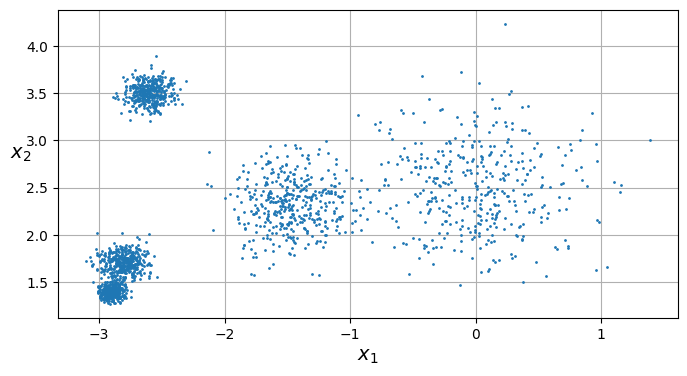

In [154]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

Centros de los clusters (inicialización automatica): [[-0.38614844  2.52076621]
 [-2.85127128  1.55334118]
 [-2.60140129  3.49914817]
 [ 0.29243017  2.49357755]
 [-1.46971456  2.31681286]]


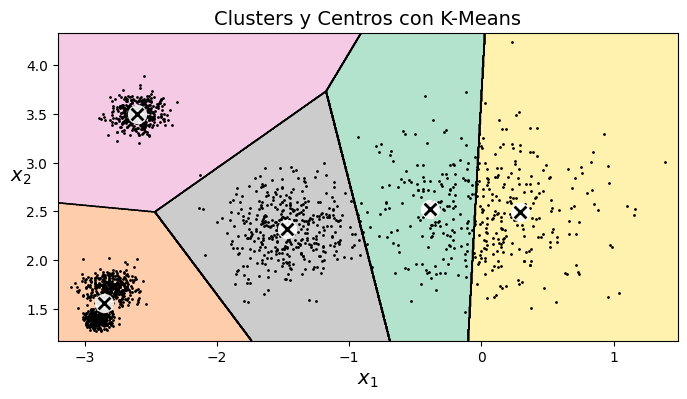

In [155]:
# Apartado 1
k = 5
n_init = 1
# Ajustar el modelo K-Means con 5 clusters y n_init=1
kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=0)
kmeans.fit(X)


#Apartado 2
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

# Obtener los centros de los clusters
centers = kmeans.cluster_centers_
print("Centros de los clusters (inicialización automatica):", centers)


# Visualizar los clusters y los centros, con los bordes
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.title("Clusters y Centros con K-Means")
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()


In [156]:
#Apartado 3
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

# Clustering duro (predict)
predictions = kmeans.predict(X_new)
print("Predicciones de las nuevas instancias:", predictions)

# Clustering flexible (transform)
probabilities = kmeans.transform(X_new)
print("Probabilidades de pertenencia a cada cluster para las nuevas instancias:\n", probabilities)




Predicciones de las nuevas instancias: [3 3 2 1]
Probabilidades de pertenencia a cada cluster para las nuevas instancias:
 [[0.6483117  2.88604435 3.00245465 0.57370219 1.50347307]
 [3.42595953 5.86829444 5.79854651 2.75219061 4.48092833]
 [2.65742075 1.45428401 0.63877213 3.33114997 1.67586342]
 [2.61393405 0.95827092 1.07572208 3.29243644 1.5412109 ]]


Centros de los clusters (inicialización manual): [[ 0.32181934  2.2272408 ]
 [ 0.0151717   2.97879165]
 [-1.47407311  2.31913598]
 [-0.41988946  2.31630649]
 [-2.76837841  2.20246552]]
Inercia del modelo: 1185.7089967929855
Score del modelo (inercia negativa): -1185.7089967929855


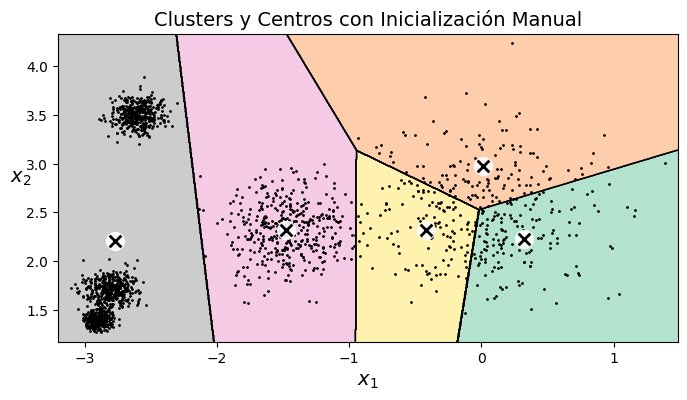

In [157]:
#Apartado 4
# Elegir los centros iniciales manualmente
good_init = np.array([[2, 3], [-3, -3], [3, -3], [0, 0], [-3, 3]])

# Ajustar el modelo K-Means con los centros iniciales elegidos manualmente y n_init=1
kmeans_manual_init = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=0)
kmeans_manual_init.fit(X)

# Obtener los centros de los clusters
manual_centers = kmeans_manual_init.cluster_centers_
print("Centros de los clusters (inicialización manual):", manual_centers)

# Imprimir los valores de inercia
print("Inercia del modelo:", kmeans_manual_init.inertia_)

# Imprimir los valores de score
print("Score del modelo (inercia negativa):", kmeans_manual_init.score(X))

# Visualizar los clusters y los centros utilizando plot_decision_boundaries con inicialización manual(utilizando los datos originales)
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_manual_init, X)
plt.title("Clusters y Centros con Inicialización Manual")
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

En este caso vemos que al elegir los centros de forma manual la clasificación de los clusters no es la correcta, vemos como junta dos conjuntos de la izquierda que en el ejercicio anterior estaban separados, sacamos la conclusión de que elegir de forma manual los centros puede llevar a error si estos no son cercanos a la solucion real.

Centros de los clusters (múltiples inicializaciones): [[-1.44960156  2.31750158]
 [-2.85127128  1.55334118]
 [-2.60140129  3.49914817]
 [ 0.08585661  2.16932516]
 [-0.03403189  2.89209958]]
Inercia del modelo: 182.4228008768651
Score del modelo (inercia negativa): -182.42280087686515


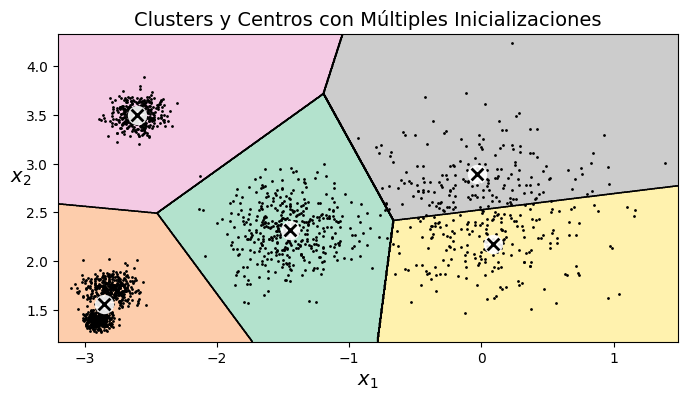

In [158]:
#Apartado 5

# Ajustar el modelo K-Means con 5 clusters y n_init=10
kmeans_multiple_init = KMeans(n_clusters=5, n_init=10, random_state=0)
kmeans_multiple_init.fit(X)

# Obtener los centros de los clusters
multiple_init_centers = kmeans_multiple_init.cluster_centers_
print("Centros de los clusters (múltiples inicializaciones):", multiple_init_centers)

# Imprimir los valores de inercia
print("Inercia del modelo:", kmeans_multiple_init.inertia_)

# Imprimir los valores de score
print("Score del modelo (inercia negativa):", kmeans_multiple_init.score(X))

# Visualizar los clusters y los centros utilizando plot_decision_boundaries con múltiples inicializaciones
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_multiple_init, X)
plt.title("Clusters y Centros con Múltiples Inicializaciones")
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

La función score() devuelve la inercia negativa porque, por convención en Scikit-Learn, los métodos de score se utilizan para la maximización, es decir, un mayor valor de score es mejor. Dado que la inercia debe minimizarse, se devuelve como un valor negativo para seguir esta convención.

Por lo que con los resultados obtenidos en el apartado anterior obtuvimos una inercia de  1185.7089967929855, y en el segundo obtenemos 182.4228008768651, por lo que podemos concluir que la inicializacion manual de centros es mucho menos efectiva que la automatica, y que además utilizando un n_init de 10, es decir repitiendo el proceso de inicialización 10 veces obtenemos un perfil bastante mejor y unos resultados algo mas precisos pues podemos ver gráficamente que la solucion es mas cercana a la realidad, aunque sigue sin ser perfecta por la asignación de k=5.

Ya que para el apartado 6 debemos usar diferentes tipos de inicializacion y de variantes de algoritmo vamos a explicar las que vamos a usar:

**Métodos de Inicialización**
Los métodos de inicialización que vamos a probar son:
*   init='random': Inicialización aleatoria de los centroides.
*   init='k-means++': Inicialización inteligente que selecciona centroides distantes entre sí (por defecto).

**Variantes del Algoritmo**
*   algorithm='full': Utiliza el algoritmo EM estándar(el que usa k-means de forma estandar).
*   algorithm='elkan': Utiliza la optimización de Elkan para acelerar la convergencia utilizando la desigualdad triangular.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


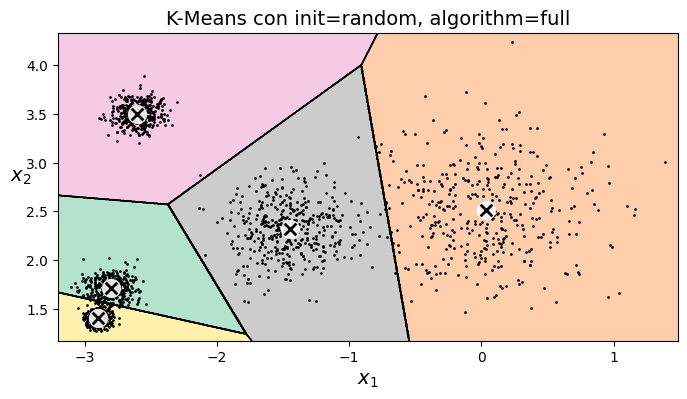

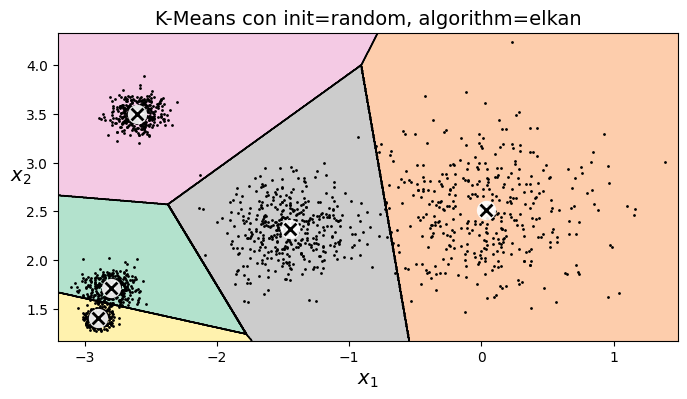

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


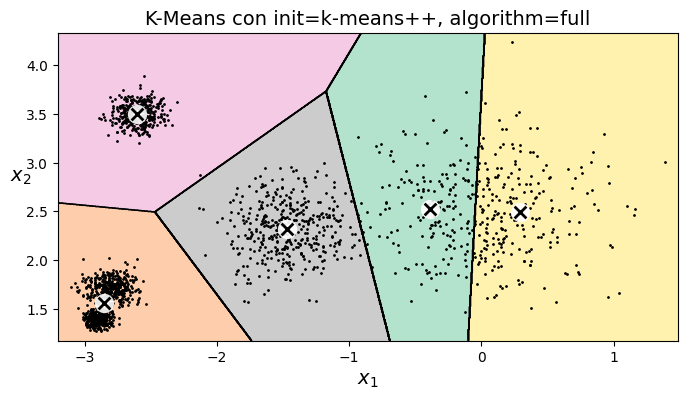

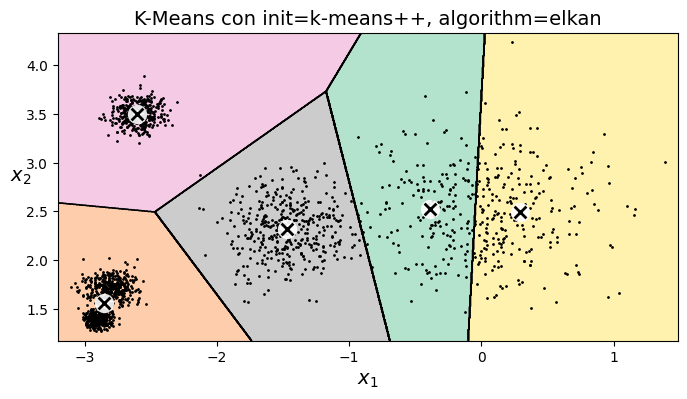

In [159]:
#Apartado 6

# Diferentes métodos de inicialización y variantes del algoritmo
initialization_methods = ['random', 'k-means++']
algorithm_variants = ['full', 'elkan']

# Función para ajustar y graficar K-Means con diferentes inicializaciones y algoritmos
def fit_and_plot_kmeans(init_method, algorithm_variant):
    kmeans = KMeans(n_clusters=5, init=init_method, n_init=1, algorithm=algorithm_variant, random_state=0)
    kmeans.fit(X)
    plt.figure(figsize=(8, 4))
    plot_decision_boundaries(kmeans, X)
    plt.title(f"K-Means con init={init_method}, algorithm={algorithm_variant}")
    plt.gca().set_axisbelow(True)
    plt.grid()
    plt.show()

# Ajustar y graficar K-Means para cada combinación de inicialización y algoritmo
for init_method in initialization_methods:
    for algorithm_variant in algorithm_variants:
        fit_and_plot_kmeans(init_method, algorithm_variant)

Lo primero que he notado es que difieren unicamente cuando el valor de n_init es 1, porque en primeras ejecuciones lo puse a 10 y el resultado era el mismo, por lo que puedo concluir que con numerosas inicializaciones independientemente del init o el algorithm, los resultados deberian de ser buenos, en cambio cuando asignamos n_init a 1 es cuando podemos ver las diferencias:



**Comparación de Métodos de Inicialización**
* k-means++:

  * Produce clusters más coherentes y bien formados. La inicialización inteligente de centroides distantes ayuda a evitar soluciones subóptimas, como podemos observar, aunque el conjunto es pequeño.
  * Observaciones:
    En los gráficos, los clusters con k-means++ parecen estar mejor separados y centrados alrededor de sus respectivos centroides.
    Esto es evidente en los gráficos tanto con el algoritmo elkan como con full.
* random:
  * Puede llevar a soluciones subóptimas, así que podemos asumir que para problemas de alta dimensionalidad o con datos mas complejos sería menos eficiente.
  * Observaciones: En los gráficos, los clusters con inicialización random no están tan bien separados y tienen formas menos definidas. Sin embargo, la calidad de los clusters es razonable, pero inferior en comparación con k-means++.

* Conclusion: En métodos de inicialización parece que utilizar k-means++ es mejor a largo plazo y para conjuntos de datos mas grandes.

**Comparación de Variantes del Algoritmo**
* full (Algoritmo EM estándar):
  * Es el enfoque clásico y es fiable para la mayoría de los problemas.
  * Los resultados son consistentes con ambos métodos de inicialización.
  * La calidad de los clusters es buena y los centroides parecen estar bien colocados.
* elkan:
  * Utiliza la desigualdad triangular para acelerar la convergencia.
  * Puede ser más eficiente en problemas de alta dimensionalidad.
  * Los resultados son muy similares a los del algoritmo full.



**init=k-means++, algorithm=elkan:**
* Los clusters están bien definidos y separados.
* Los centroides están ubicados de manera óptima.

**init=random, algorithm=elkan:**
  * Los clusters están razonablemente bien formados, pero hay menor coherencia comparado con k-means++.
  * Los centroides no siempre están ubicados de manera óptima.

**init=k-means++, algorithm=full:**
* Similar a elkan con k-means++, clusters bien definidos y separados.
* Los centroides están ubicados de manera óptima.

**init=random, algorithm=full:**
* Similar a elkan con random, clusters razonablemente bien formados pero menos coherentes.
* Los centroides no siempre están ubicados de manera óptima.

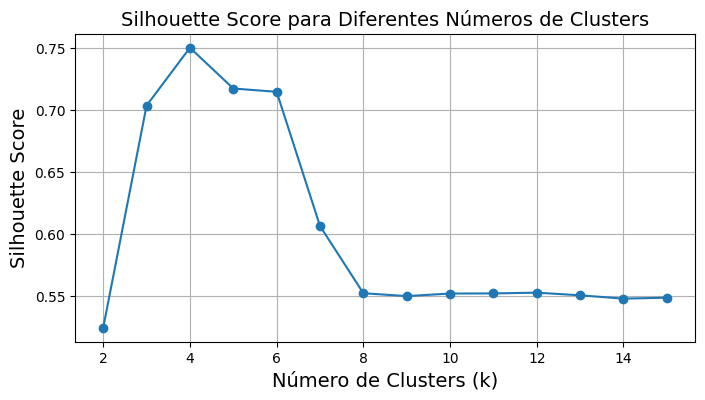

In [160]:
#Apartado 7
from sklearn.metrics import silhouette_score

# Rango de valores de k para evaluar
range_n_clusters = range(2, 16)

# Lista para almacenar los silhouette scores
silhouette_scores = []

# Calcular el silhouette score para cada valor de k
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar el silhouette score en función del número de clusters
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score para Diferentes Números de Clusters")
plt.grid(True)
plt.show()

Podemos ver en el gráfico obtenido que **silhouette score** alcanza su valor máximo en **k=4** con un valor de aproximadamente **0.75**. Esto indica que, para k=4, los clusters están bien formados y separados. Tambien podemos ver que para **k=5** el resultado es bastante bueno aunque no es el ótpimo, vemos que se queda en un alor aproximado de **0.72**, y es el valor que hemos estado utilizando el los apartados anteriores. Concluimos que la mejor asignación seria **k=4**.

Para n_clusters = 3, el silhouette score promedio es: 0.7035302391285877


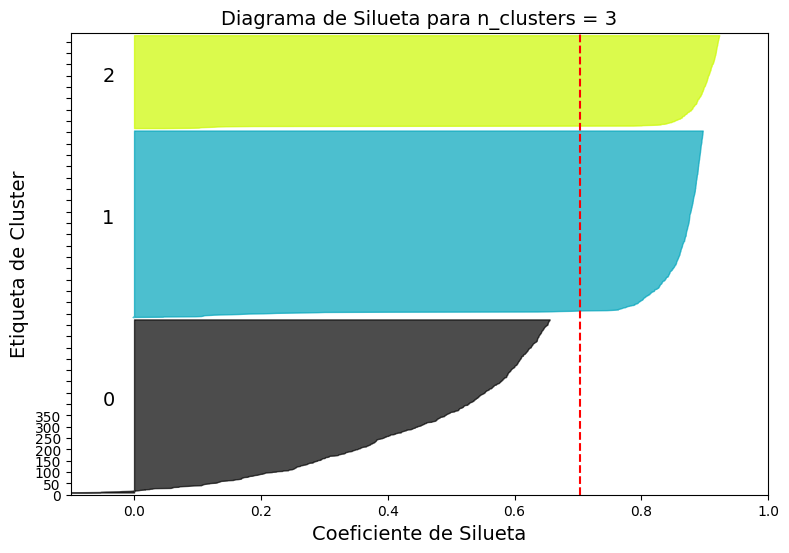

Para n_clusters = 4, el silhouette score promedio es: 0.7502950206907029


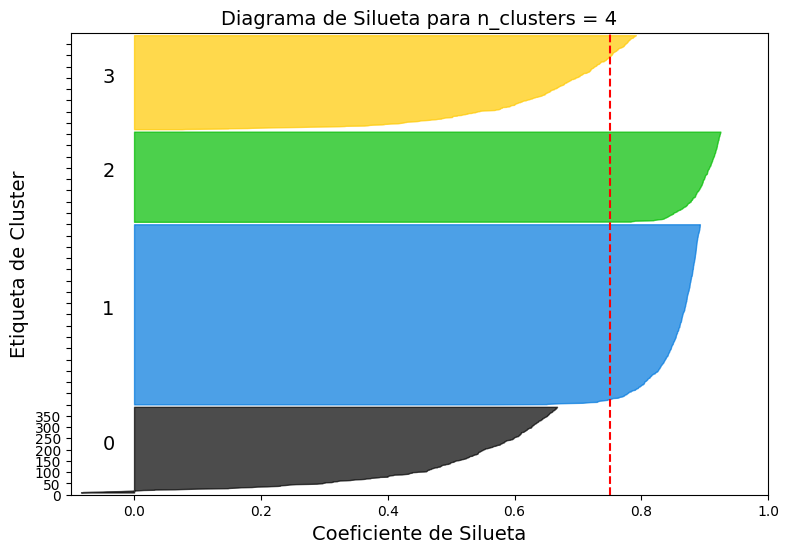

Para n_clusters = 5, el silhouette score promedio es: 0.7173245086360255


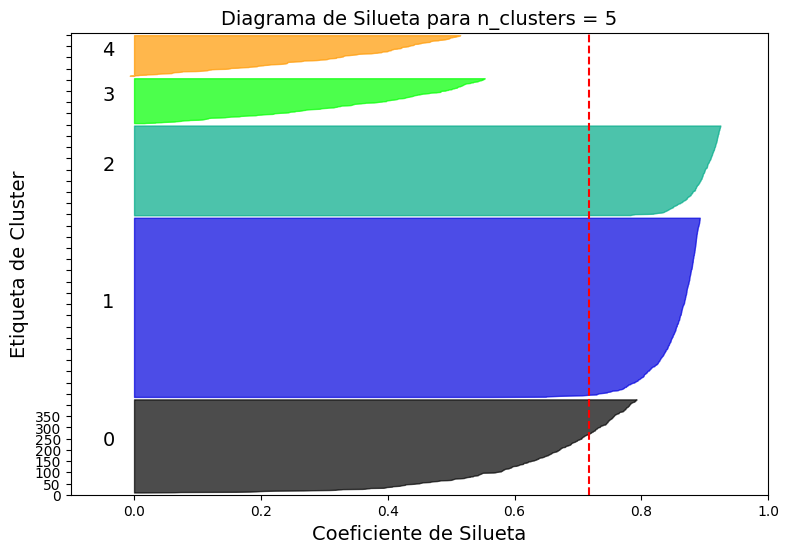

Para n_clusters = 6, el silhouette score promedio es: 0.7146692783280846


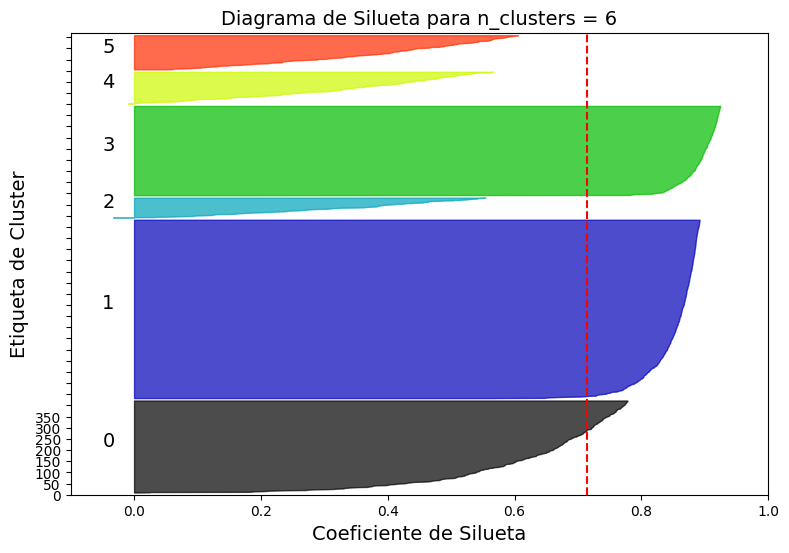

In [161]:
#Apartado 8

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

# Rango de valores de k para evaluar
range_n_clusters = [3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Crear una figura para el diagrama de silueta
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 6)

    # El subgráfico de silueta
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Inicializar el clusterer con n_clusters
    clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # Calcular el silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"Para n_clusters = {n_clusters}, el silhouette score promedio es: {silhouette_avg}")

    # Calcular los valores de silueta para cada muestra
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Agregar los valores de silueta para el cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Etiqueta en el gráfico
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Computar el nuevo y_lower para el siguiente cluster
        y_lower = y_upper + 10

    ax1.set_title(f"Diagrama de Silueta para n_clusters = {n_clusters}")
    ax1.set_xlabel("Coeficiente de Silueta")
    ax1.set_ylabel("Etiqueta de Cluster")

    # Línea vertical para el silhouette score promedio
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # Personalizar las etiquetas del eje y con el número de clusters
    ax1.yaxis.set_major_locator(FixedLocator(np.arange(0, len(X) + (n_clusters + 1) * 10, 50)))
    ax1.yaxis.set_major_formatter(FixedFormatter(['0', '50', '100', '150', '200', '250', '300', '350']))

    plt.show()

**Número Óptimo de Clusters:**

* El número óptimo de clusters es k=4, ya que tiene el silhouette score promedio más alto y muestra una buena cohesión y separación entre los clusters.
* Los clusters con k=4 tienen formas amplias y uniformes, lo que indica una asignación clara y precisa de los puntos a los clusters respectivos.

**Comparación con Otros Valores de k:**

* Aunque k=3 y k=5 también muestran buenos resultados, k=4 es superior en términos de cohesión y separación.
* k=6 muestra un descenso significativo en la calidad del clustering, con menor cohesión y separación, y mayor variabilidad en los coeficientes de silueta.

El apartado 9 me daba muchos errores al intentar importar el dataset olivetti_faces directamente de sklearn, me daba error 403, por lo que he tenido que descargarlo de forma manual y subirlo al drive

In [162]:
from google.colab import drive
drive.mount('/content/drive')

# Ruta a los archivos en Google Drive
faces_path = '/content/drive/My Drive/database/olivetti_dataset/olivetti_faces.npy'
target_path = '/content/drive/My Drive/database/olivetti_dataset/olivetti_faces_target.npy'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
#Apartado 9

#from sklearn.datasets import fetch_olivetti_faces
# 1. Cargar el Conjunto de Datos de Olivetti
#olivetti = fetch_olivetti_faces()
#X = olivetti.data
#y = olivetti.target

# 1.Carga manual de dataset
X = np.load(faces_path)
y = np.load(target_path)

from sklearn.model_selection import StratifiedShuffleSplit

# 2. Dividir el Conjunto de Datos en Entrenamiento y Prueba usando StratifiedShuffleSplit

# Aplanar las imágenes de 64x64 a vectores de 4096 dimensiones
X = X.reshape((X.shape[0], -1))

# Division de datos
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=0)
for train_index, test_index in split.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# 3. Aplicar los Modelos K-Means
n_clusters = 40  # hay 40 personas diferentes en el conjunto de datos

# K-Means con k-means++ y n_init=10
kmeans_plus = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=0)
kmeans_plus.fit(X_train)

# K-Means con random y n_init=1
kmeans_random_1 = KMeans(n_clusters=n_clusters, init='random', n_init=1, random_state=0)
kmeans_random_1.fit(X_train)

# K-Means con random, n_init=10 y el algoritmo elkan
kmeans_random_elkan = KMeans(n_clusters=n_clusters, init='random', n_init=10, algorithm='elkan', random_state=0)
kmeans_random_elkan.fit(X_train)

# Calcular el Silhouette Score para cada modelo
silhouette_plus = silhouette_score(X_train, kmeans_plus.labels_)
silhouette_random_1 = silhouette_score(X_train, kmeans_random_1.labels_)
silhouette_random_elkan = silhouette_score(X_train, kmeans_random_elkan.labels_)

print(f"Silhouette Score (k-means++): {silhouette_plus}")
print(f"Silhouette Score (random, n_init=1): {silhouette_random_1}")
print(f"Silhouette Score (random, n_init=10, elkan): {silhouette_random_elkan}")

Silhouette Score (k-means++): 0.1550910919904709
Silhouette Score (random, n_init=1): 0.1029563769698143
Silhouette Score (random, n_init=10, elkan): 0.10444798320531845


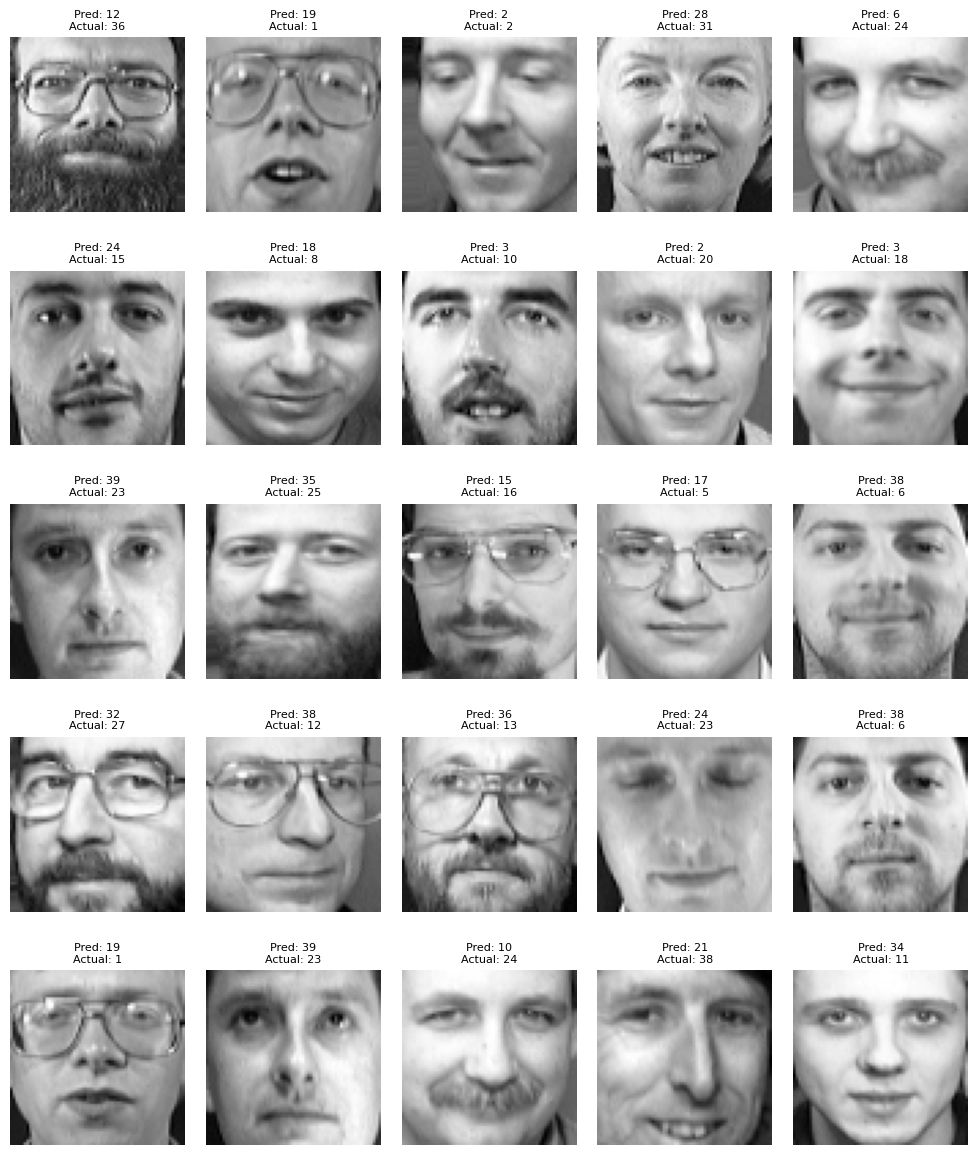

In [164]:
# Seleccionar el mejor modelo
best_model = kmeans_plus  # Basado en el análisis de los silhouette scores

# Predicciones sobre el conjunto de prueba
y_pred = best_model.predict(X_test)

# Crear etiquetas combinadas para visualización
combined_labels = [f"Pred: {pred}\nActual: {actual}" for pred, actual in zip(y_pred, y_test)]

#Nota: Funcion modificada para obtener datos mas legibles
def plot_faces(faces, labels, n_cols=5, img_shape=(64, 64)):
    faces = faces.reshape(-1, *img_shape)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols * 2, n_rows * 2.4))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label, fontsize=8)
    plt.tight_layout()
    plt.show()

# Visualizar algunas imágenes y sus etiquetas de cluster
plot_faces(X_test[:25], combined_labels[:25], n_cols=5)

**1. Calidad del Agrupamiento**
* Al observar las imágenes y sus etiquetas (predicciones y valores reales), se pueden notar los siguientes puntos:

    * Predicción Correcta vs. Etiqueta Real:
      
      * Hay varias predicciones incorrectas, lo que indica que el modelo K-Means no ha agrupado perfectamente las imágenes según las identidades reales.
      * Sin embargo, algunos grupos de caras parecen similares, lo que indica cierta capacidad del modelo para captar patrones en los datos.

* Silhouette Scores:
  * K-Means++: Silhouette Score fue el más alto, por lo que se seleccionó como el mejor modelo.
  * Random (n_init=1) y Random (n_init=10, elkan): Los silhouette scores fueron más bajos, indicando menor cohesión y separación en los clusters.

### <font color='blue'>Ejercicio 1.B: Utilización de DBSCAN (1 punto)</font>

<font color='blue'> En este ejercicio haremos algo similar a lo realizado en el anterior, pero ahora con otro problema sintético en 2D y el algoritmo DBSCAN. Para crear el conjunto sintético haremos uso de la función `make_moons` dentro del paquete de `sklearn.datasets`. Crearemos un conjunto sintético de $1.000$ puntos con una tasa de ruido de $0.05$.


<font color='blue'> Las tareas a realizar a realizar en este ejercicio se resumen a continuación:
1. A partir del conjunto de datos especificado, ajusta un algoritmo DBSCAN con los hiperparámetros por defecto (5 mínimas muestras por cluster). Identifica los índices de los ejemplos núcleo (_core points_)) e imprime sus coordenadas. Para ello, emplea las variables de instancia `core_sample_indices_` y `components_`, respectivamente.
2. La variable de instancia `labels_` contiene el núcleo al que pertenece cada ejemplo
del conjunto de datos. Observa que algunas instancias tienen un índice de cluster
igual a -1, lo que significa que el algoritmo las considera anomalías. En un conjunto
sencillo como este, en un principio, no debería haber anomalías. El hiperparámetro `eps` indica la distancia
máxima entre dos muestras para que una se considere vecina de la otra (no se trata de un
límite máximo de las distancias de los puntos dentro de un cluster). Es el hiperparámetro
de DBSCAN más importante que debes elegir adecuadamente para tu conjunto de datos y
función de distancia. Ajusta 4 modelos de DBSCAN con el hiperparámetro $eps$ igual a
$\{0.01,0.02,0.05,0.1\}$. Dibuja una representación de los clústers para cada modelo
identificando las anomalías que tiene en el gráfico y dando el porcentaje de anomalías
de cada modelo. Analiza y explica los resultados obtenidos.
3. Sorprendentemente, la clase DBSCAN no tiene un método `predict()`,
aunque sí tiene un método `fit_predict()`. En otras palabras, no puede predecir
a qué cluster pertenece una nueva instancia. Esta decisión se tomó porque diferentes
algoritmos de clasificación pueden ser mejores para diferentes tareas, por lo que los
autores decidieron dejar que el usuario eligiera cuál utilizar. Pero sí se puede usar
un clasificador para ver en qué cluster está cada punto nuevo. Hazlo con un clasificador
kNN con un vecindario de 30 vecinos, usando el mejor modelo del apartado anterior y utilizando como
ejemplos de entrenamiento los _core points_ encontrados y como etiquetas (salidas deseadas) las `labels_` obtenidas. Obtén el cluster asociado y la probabilidad para los
siguientes 4 ejemplos `[[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]]`.
Junto con lo anterior, dibuja un gráfico que represente los bordes de decisión y aplica también k-means sobre los mismo datos. Analiza las diferencias entre dichas fronteras de decisión en base al funcionamiento y naturaleza de los dos algoritmos subyacentes.
    
<font color='blue'> El alumnado debe describir en detalle el trabajo realizado y las conclusiones extraídas.



---



Coordenadas de los Ejemplos Núcleo:
[[-0.02137124  0.40618608]
 [ 0.97670045 -0.45832306]
 [ 0.90405882 -0.37651952]
 ...
 [ 1.66258462 -0.3079193 ]
 [-0.94355873  0.3278936 ]
 [ 0.79419406  0.60777171]]


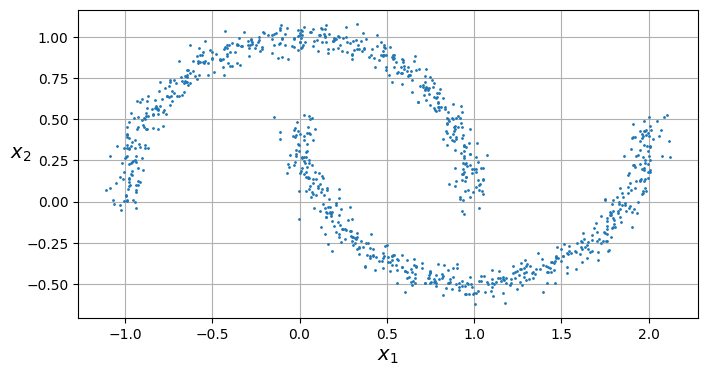

In [165]:
#Apartado 1
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Ajustar DBSCAN con hiperparámetros por defecto
dbscan = DBSCAN()
dbscan.fit(X)

# Índices de los ejemplos núcleo
core_indices = dbscan.core_sample_indices_
core_points = dbscan.components_

# Imprimir las coordenadas de los ejemplos núcleo
print("Coordenadas de los Ejemplos Núcleo:")
print(core_points)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

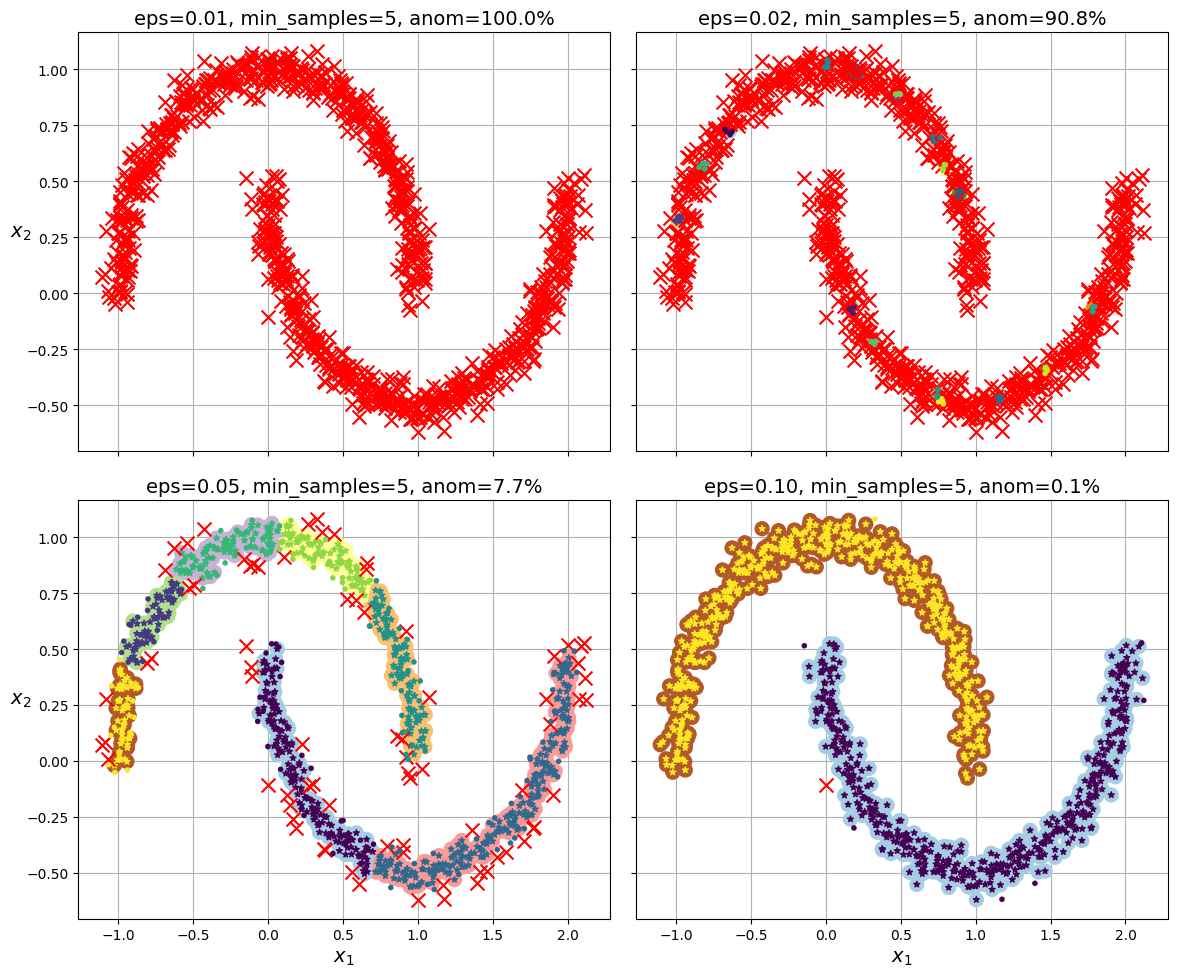

In [166]:
#Apartado 2
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True, anom_rate = 0):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}, anom={anom_rate}%")
    plt.grid()
    plt.gca().set_axisbelow(True)

# Valores de eps a probar
eps_values = [0.01, 0.02, 0.05, 0.1]

# Configuración de la figura
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i, eps in enumerate(eps_values):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan.fit(X)

    labels = dbscan.labels_
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[dbscan.core_sample_indices_] = True

    # Anomalías
    anomalies = labels == -1
    anomaly_percentage = 100 * np.sum(anomalies) / len(labels)

    # Dibujar los clusters y las anomalías usando la función plot_dbscan
    row, col = i // 2, i % 2
    plt.sca(axs[row, col])
    plot_dbscan(dbscan, X, size=100, show_xlabels=(row == 1), show_ylabels=(col == 0), anom_rate=anomaly_percentage)

plt.tight_layout()
plt.show()


**Analisis de resultados gráficos**

**Gráfico con eps = 0.01** Todos los puntos son considerados anomalías (100% anomalías).
  * Un valor de eps muy pequeño significa que prácticamente ningún punto está lo suficientemente cerca de otro para ser considerado como parte de un cluster. Esto muestra que eps = 0.01 es demasiado pequeño para este conjunto de datos.

**Gráfico con eps = 0.02** La mayoría de los puntos siguen siendo considerados anomalías (90.8% anomalías).
   * Aumentar ligeramente eps reduce el número de anomalías, pero sigue siendo insuficiente para formar clusters significativos. Este valor de eps sigue siendo demasiado pequeño.

**Gráfico con eps = 0.05** La mayoría de los puntos forman dos clusters principales, con un pequeño porcentaje de anomalías (7.7% anomalías).
  * Este valor de eps es más adecuado para el conjunto de datos. Los dos clusters principales de la estructura de "medias lunas" se forman claramente, con solo unas pocas anomalías.

**Gráfico con eps = 0.10** La gran mayoría de los puntos se agrupan en dos clusters principales, con casi ninguna anomalía (0.1% anomalías).
  * Este valor de eps es el más adecuado de los probados. Forma clusters bien definidos que capturan la estructura subyacente del conjunto de datos con muy pocas anomalías.


Instancia 1: [-0.5  0. ]
  Cluster Predicho: 1
  Probabilidades: [0.1 0.9]
Instancia 2: [0.  0.5]
  Cluster Predicho: 0
  Probabilidades: [1. 0.]
Instancia 3: [ 1.  -0.1]
  Cluster Predicho: 1
  Probabilidades: [0. 1.]
Instancia 4: [2. 1.]
  Cluster Predicho: 0
  Probabilidades: [1. 0.]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


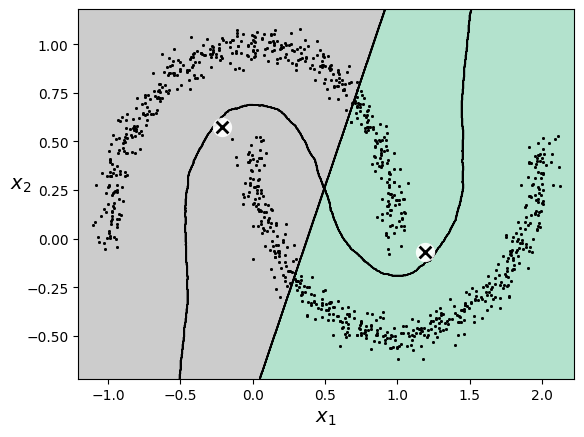

In [167]:
#Apartado 3
from sklearn.neighbors import KNeighborsClassifier


# Mejor modelo DBSCAN con eps=0.1
best_dbscan = DBSCAN(eps=0.1, min_samples=5)
best_dbscan.fit(X)

# Core points y sus etiquetas
core_indices = best_dbscan.core_sample_indices_
core_points = best_dbscan.components_
core_labels = best_dbscan.labels_[core_indices]

# Clasificador kNN con 30 vecinos
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(core_points, core_labels)

# Nuevas instancias a predecir
new_instances = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
new_labels = knn.predict(new_instances)
new_probabilities = knn.predict_proba(new_instances)

# Imprimir resultados
for i, (instance, label, prob) in enumerate(zip(new_instances, new_labels, new_probabilities)):
    print(f"Instancia {i+1}: {instance}")
    print(f"  Cluster Predicho: {label}")
    print(f"  Probabilidades: {prob}")

# Dibujar bordes de decisión para DBSCAN usando kNN
plot_decision_boundaries(knn, X, resolution=1000, show_centroids=False)

# Aplicar K-Means y dibujar bordes de decisión
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
plot_decision_boundaries(kmeans, X, resolution=1000, show_centroids=True)

**DBSCAN vs K-Means:**
* DBSCAN: Captura mejor la estructura no lineal del conjunto de datos make_moons, lo que es evidente en los bordes de decisión irregulares. Esto permite que DBSCAN maneje formas de clusters arbitrarias.
* K-Means: Supone que los clusters tienen una forma esférica, lo cual es adecuado para datos con clusters de forma aproximadamente circular. Los bordes de decisión son lineales, lo que no se adapta bien a la estructura no lineal de los datos.


## <font color='blue'>Ejercicio 2: PROBLEMA DE AGRUPAMIENTO (5 puntos)</font>

<font color='blue'> Para la realización de este ejercicio, se ha seleccionado el dataset denominado "Anuran Calls (MFCCs)" [1] (https://archive.ics.uci.edu/dataset/406/anuran+calls+mfccs). Este conjunto de datos describe las características sonoras de los cantos de diferentes especies de anfibios del orden Anura, cuyos integrantes coloquialmente son conocidos como ranas o sapos.

<font color='blue'> Se encuentran representados por medio de los coeficientes cepstrales en las frecuencias de Mel ([_Mel-frequency cepstral coefficients_](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum), MFCCs), que son en esencia, una representación abstracta de una señal de audio obtenida al aplicar una transformada del coseno discreta a un espectrograma de Mel, es decir, una representación  de las frecuencias auditivas que son capaces de captar los humanos. Debido a ser una representación compacta del [espectrograma](https://en.wikipedia.org/wiki/Spectrogram), manteniendo las características más importantes del audio, se utiliza de forma regular en procesado del habla y aplicaciones de aprendizaje automático en procesado de señales de audio [2].

<font color='blue'> El dataset, creado por investigadores de la Universidad Federal del Amazonas en Brasil, contiene individuos de 10 especies, también incluyéndose su género y familia taxonómica, con el objetivo original de lograr realizar una clasificación multiclase de las especies de anuros que fueron grabados en los terrenos de la Universidad, así como de Mata atlántica (Brasil) y Córdoba (Argentina) en condiciones reales, es decir, con ruido de fondo.
    
<font color='blue'> Este conjunto de datos se utilizó en varias tareas de clasificación relacionadas con el reto del reconocimiento de especies de anuros a través de sus llamadas. Se trata de un conjunto de datos multietiqueta con tres columnas de etiquetas. Este conjunto de datos se creó segmentando 60 registros de audio pertenecientes a 4 familias diferentes, 8 géneros y 10 especies. Cada audio corresponde a un espécimen (una rana individual), el ID del registro también se incluye como columna adicional. Se utilizaron la entropía espectral y un método de cluster binario para detectar los fragmentos de audio pertenecientes a cada sonido. La segmentación y la extracción de características se realizaron en Matlab. Tras la segmentación se obtuvieron 7195 sílabas, que se convirtieron en instancias para entrenar y probar el clasificador.

<font color='blue'> Resulta entonces interesante saber si las clasificaciones taxonómicas realizadas tienen sentido en cuanto a los datos, es decir, ¿realmente se corresponden de cierta forma los distintos cantos de los anuros con la clasificación que poseen actualmente? ¿O existen especies que, siendo de diferentes grupos taxonómicos, poseen un canto indistinguible?

### <font color='blue'> Objetivos
    
<font color='blue'> El objetivo del presente trabajo es analizar los patrones de los datos, sin tomar en cuenta su _ground truth_, para determinar si la clasificación taxonómica actual corresponde razonablemente con una diferencia en los cantos. Claro está que este estudio representará un análisis superficial del problema, pero al menos sí podrá servir de base para estudiar si podemos determinar una taxonomía aproximada de los anuros.

<font color='blue'> Para llevar a cabo este objetivo principal se llevarán a cabo los siguientes objetivos secundarios:
1. <font color='blue'> Realización de un análisis exploratorio de los datos para una primera observación de las distribuciones de los cantos.
2. Detección y eliminación de _outliers_ así como las transformaciones necesarias para que los datos sean lo más "correctos" para los métodos de _clustering_.
4. Experimentación y determinación de los algoritmos y métricas intrínsecas más acordes a los datos. El alumnado debe experimentar con, al menos, dos algoritmos diferentes de _clustering_.

### <font color='blue'> Hipótesis
<font color='blue'>Sobre los datos se pueden realizar las siguientes hipótesis:
- <font color='blue'>Los datos, siendo grabaciones que incluyen el ruido de fondo, poseerán una cantidad significativa de _outliers_.
- <font color='blue'>Será posible, al menos en parte, observar cierta "agrupación" en los datos a simple vista.
- <font color='blue'>Existirá cierta correlación entre los _MFCCs_ debido a que provienen de una misma grabación, por lo que ciertas columnas/características crecerán o disminuirán de forma conjunta. En otras palabras, como el dispositivo empleado para adquirir sonidos es el mismo para todas las pistas de audio (7195), es razonable pensar que si algún _MFCC_ presenta algún problema, o atenuación de algún tipo, dicha particularidad podrá estar presente en todas las instancias/observaciones.  

### <font color='blue'> Resultados Esperados
<font color='blue'> Se espera que los resultados que se obtengan del clustering sean razonablemente parecidos a la realidad. Es decir, se espera que el agrupamiento encontrado tenga algún tipo de relación con alguna de las últimas 4 columnas de los datos (_Family_, _Genus_, _Species_ o _RecordID_).

### <font color='blue'> Bibliografía

<font color='blue'><font color='blue'>[1] E. N. Juan Colonna, “Anuran Calls (MFCCs).” UCI Machine Learning Repository, 2015. doi: 10.24432/C5CC9H. https://archive.ics.uci.edu/dataset/406/anuran+calls+mfccs

<font color='blue'>[2] “3.8. The cepstrum, mel-cepstrum and mel-frequency cepstral coefficients (MFCCs) — Introduction to Speech Processing.” Accessed: Jan. 13, 2024. [Online]. Available: https://speechprocessingbook.aalto.fi/Representations/Melcepstrum.html#the-cepstrum




In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [169]:
#Para acceder a nuestros ficheros de Google Drive
from google.colab import drive
drive.mount('/content/drive')
# La carpeta 'clasificacion' (que contiene optdigits.tes, optdigits.tra, optdigits.names)
# debe estar en vuestro Drive, dentro de la carpeta 'Colab Notebooks'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [170]:
dataFolder = 'drive/MyDrive/Colab Notebooks/clustering/'

data = pd.read_csv(dataFolder + "/dataset/Frogs_MFCCs.csv")
data

MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1          1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2          1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3          1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4          1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   
...        ...       ...       ...       ...       ...       ...       ...   
7190       1.0 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889   
7191       1.0 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628   
7192       1.0 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905   
7193       1.0 -0.519497 -0.307553 -0.004922  0.072865  0.377131  0.086866   
7194       1.0 -0.508833 -0.324106  0.062068  0.078211  0.397188  0.094596   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_17  MFCCs_18  MFCCs_19  \
0    -0.150063 -0.171128  0.124676  ... -0.108351 -0.077623 -0.009568   
1    -0.222475 -0.207693  0.170883  ... -0.090974 -0.056510 -0.035303   
2    -0.242234 -0.219153  0.232538  ... -0.050691 -0.023590 -0.066722   
3    -0.194347 -0.098181  0.270375  ... -0.136009 -0.177037 -0.130498   
4    -0.265423 -0.172700  0.266434  ... -0.048885 -0.053074 -0.088550   
...        ...       ...       ...  ...       ...       ...       ...   
7190 -0.100753  0.037087  0.081075  ...  0.069430  0.071001  0.021591   
7191 -0.116460  0.063727  0.089034  ...  0.061127  0.068978  0.017745   
7192 -0.103317  0.070370  0.081317  ...  0.082474  0.077771 -0.009688   
7193 -0.115799  0.056979  0.089316  ...  0.051796  0.069073  0.017963   
7194 -0.117672  0.058874  0.076180  ...  0.061455  0.072983 -0.003980   

      MFCCs_20  MFCCs_21  MFCCs_22           Family      Genus  \
0     0.057684  0.118680  0.014038  Leptodactylidae  Adenomera   
1     0.020140  0.082263  0.029056  Leptodactylidae  Adenomera   
2    -0.025083  0.099108  0.077162  Leptodactylidae  Adenomera   
3    -0.054766 -0.018691  0.023954  Leptodactylidae  Adenomera   
4    -0.031346  0.108610  0.079244  Leptodactylidae  Adenomera   
...        ...       ...       ...              ...        ...   
7190  0.052449 -0.021860 -0.079860          Hylidae     Scinax   
7191  0.046461 -0.015418 -0.101892          Hylidae     Scinax   
7192  0.027834 -0.000531 -0.080425          Hylidae     Scinax   
7193  0.041803 -0.027911 -0.096895          Hylidae     Scinax   
7194  0.031560 -0.029355 -0.087910          Hylidae     Scinax   

             Species  RecordID  
0     AdenomeraAndre         1  
1     AdenomeraAndre         1  
2     AdenomeraAndre         1  
3     AdenomeraAndre         1  
4     AdenomeraAndre         1  
...              ...       ...  
7190     ScinaxRuber        60  
7191     ScinaxRuber        60  
7192     ScinaxRuber        60  
7193     ScinaxRuber        60  
7194     ScinaxRuber        60  

[7195 rows x 26 columns]

###Paso 1: Análisis Exploratorio de los Datos

   MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0       1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1       1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2       1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3       1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4       1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   

   MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_17  MFCCs_18  MFCCs_19  MFCCs_20  \
0 -0.150063 -0.171128  0.124676  ... -0.108351 -0.077623 -0.009568  0.057684   
1 -0.222475 -0.207693  0.170883  ... -0.090974 -0.056510 -0.035303  0.020140   
2 -0.242234 -0.219153  0.232538  ... -0.050691 -0.023590 -0.066722 -0.025083   
3 -0.194347 -0.098181  0.270375  ... -0.136009 -0.177037 -0.130498 -0.054766   
4 -0.265423 -0.172700  0.266434  ... -0.048885 -0.053074 -0.088550 -0.031346   

   MFCCs_21  MFCCs_22           Family      Genus         Species  R

<Figure size 2000x1500 with 0 Axes>

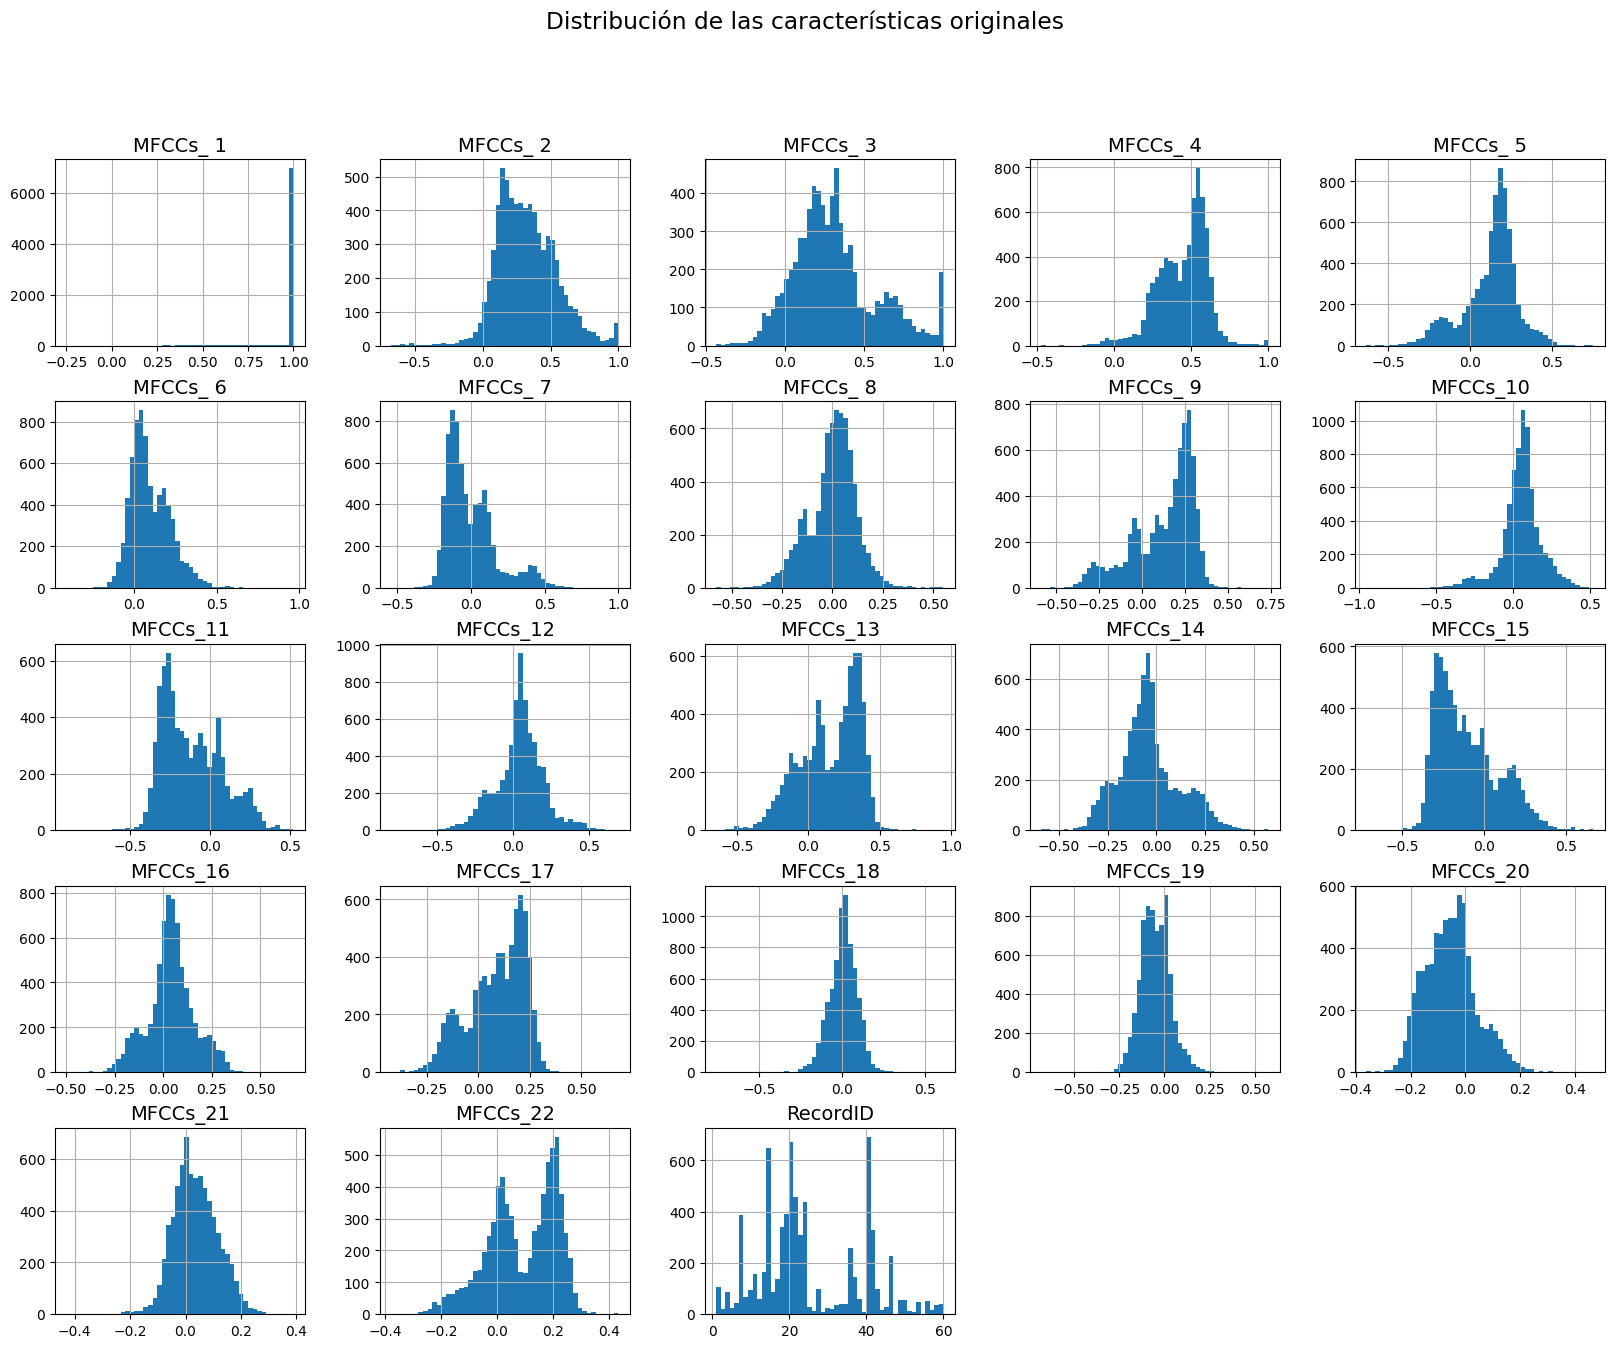

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
data = pd.read_csv(dataFolder + "/dataset/Frogs_MFCCs.csv")

# Inspeccionar las primeras filas del dataset
print(data.head())

# Resumen estadístico
print(data.describe())

# Visualización de distribuciones
plt.figure(figsize=(20, 15))
data.hist(bins=50, figsize=(20, 15))
plt.suptitle('Distribución de las características originales')
plt.show()


Tras el analisis del conjunto de datos, sacamos las siguientes conclusiones:

Sesgo en MFCCs_1:

- La característica MFCCs_1 está altamente sesgada hacia el valor 1, lo que indica que puede no ser muy informativa para el análisis de clustering. Podría ser una constante o tener una variación muy pequeña.

Variabilidad en MFCCs:

- La variabilidad en las otras características de MFCCs indica que estas características pueden contener información útil para el clustering, ya que tienen diferentes rangos y distribuciones.

RecordID:

La distribución de RecordID indica que algunos registros de audio proporcionan más datos que otros. Esto podría influir en los resultados del clustering si no se maneja adecuadamente, por lo que deberiamos de realizar un escalado de los datos y tratar los outliers.


###Paso 2: Detección y Eliminación de Outliers


Utilizaremos el Z-score para la deteccion de outliers porque es una buena técnica para detectarlos, un valor absoluto del Z-score mayor que 3 se considera generalmente un outlier.

La normalización la haremos con StandardScaler, ya que ajusta los datos para que tengan media 0 y desviación estándar 1, lo que es importante para algoritmos de clustering.

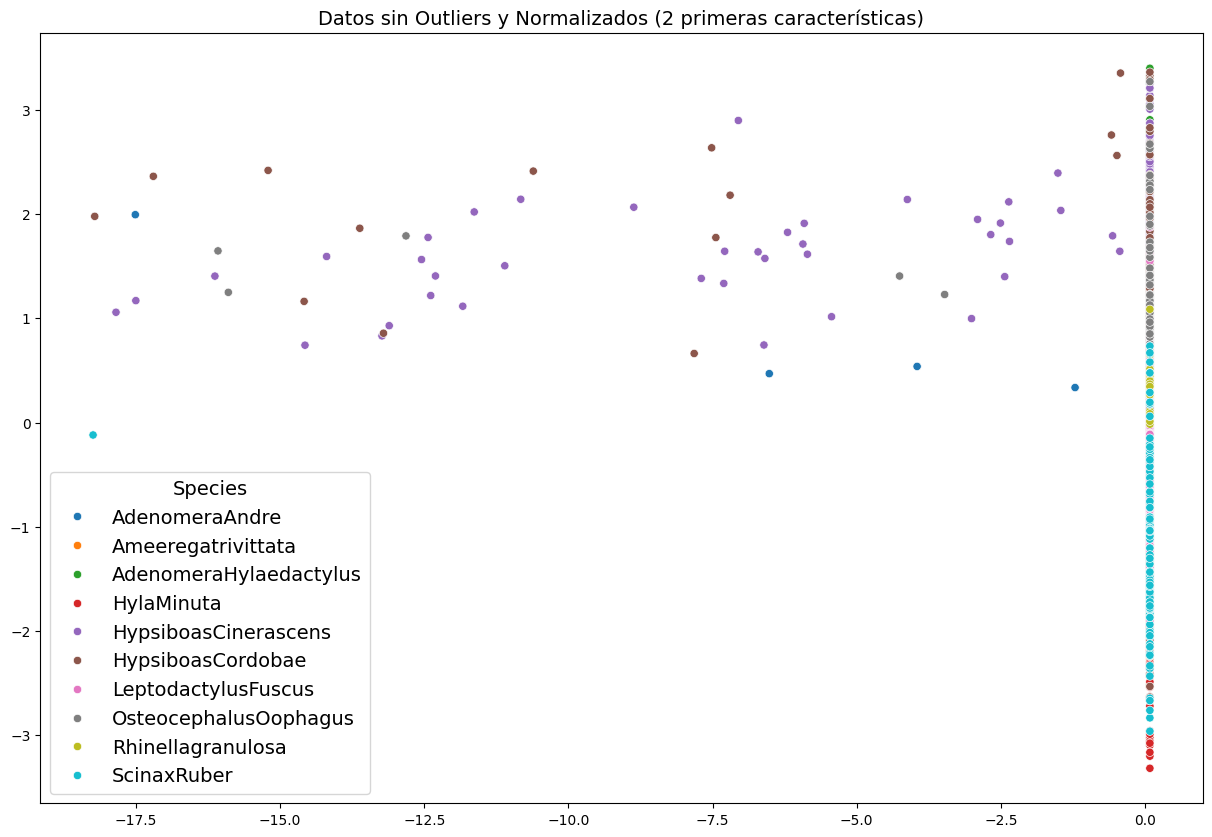

<Figure size 2000x1500 with 0 Axes>

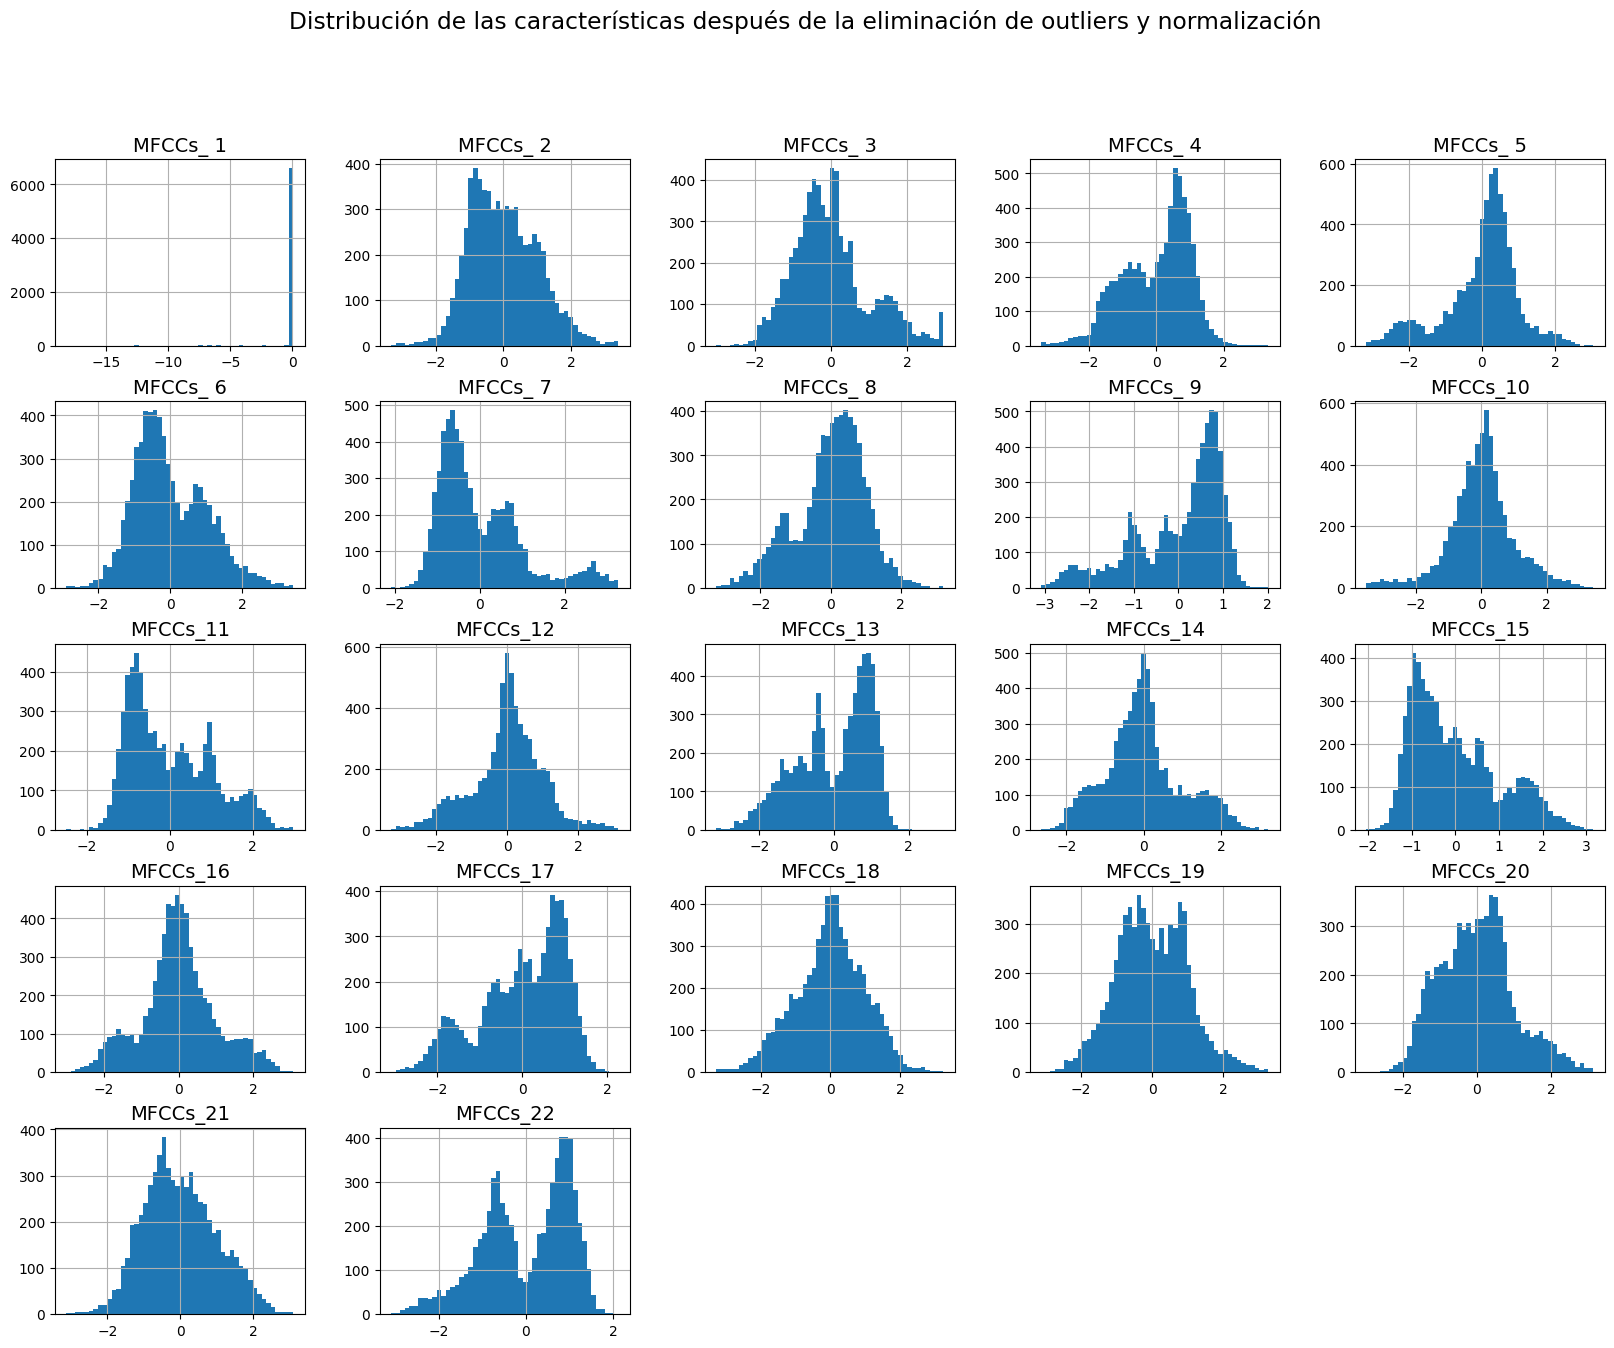

In [172]:
# Separar las características numéricas y las etiquetas
X = data.iloc[:, :-4]
y = data.iloc[:, -4:]

# Detección de outliers usando Z-score
z_scores = stats.zscore(X)
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
X_filtered = X[filtered_entries]
y_filtered = y[filtered_entries]
data_cleaned = data[filtered_entries]


# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

# Visualización de los datos sin outliers (Usando solo las dos primeras características para la visualización)
plt.figure(figsize=(15, 10))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_filtered['Species'])
plt.title('Datos sin Outliers y Normalizados (2 primeras características)')
plt.show()

# Visualización de la distribución de las características después de la eliminación de outliers y normalización
plt.figure(figsize=(20, 15))
pd.DataFrame(X_scaled, columns=X.columns).hist(bins=50, figsize=(20, 15))
plt.suptitle('Distribución de las características después de la eliminación de outliers y normalización')
plt.show()


El análisis y la visualización muestran que los datos han sido limpiados y normalizados adecuadamente. Las características tienen distribuciones más uniformes y están centradas alrededor de cero.

###Paso 3: Experimentación con Algoritmos de Clustering


#### 3.1 Aplicación del kmeans

##### Determinación del Número Óptimo de Clusters para K-means

En este paso, utilizaremos el Silhouette Score para determinar el número óptimo de clusters para el algoritmo K-means. Nos quedaremos con el valor mas alto para la experimentación posterior.

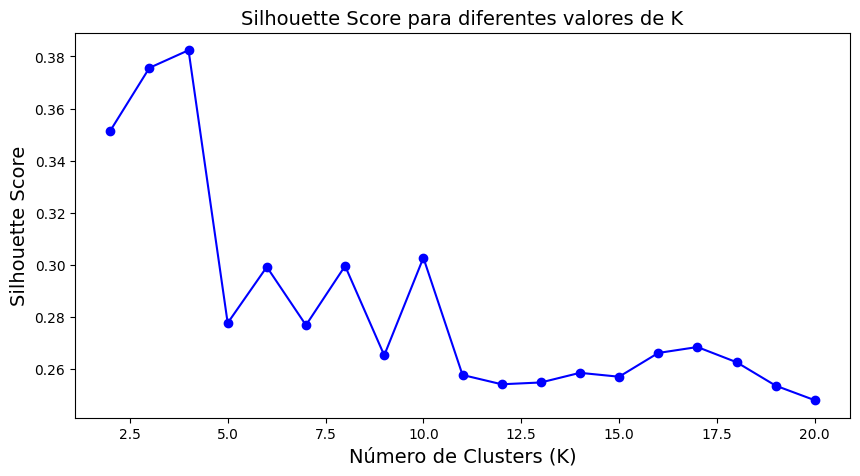

In [173]:
# Encontrar el número óptimo de clusters usando Silhouette Score
silhouette_avg = []
K = range(2, 21)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(X_scaled, cluster_labels))

# Plot del Silhouette Score para diferentes K
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_avg, 'bo-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes valores de K')
plt.show()


##### Aplicación de K-means con el Número Óptimo de Clusters



Vamos a utilizar K=4 para aplicar el algoritmo K-Means y visualizaremos los resultados.

K-Means Silhouette Score: 0.38240262558369914
K-Means Adjusted Rand Index: 0.757637477309256


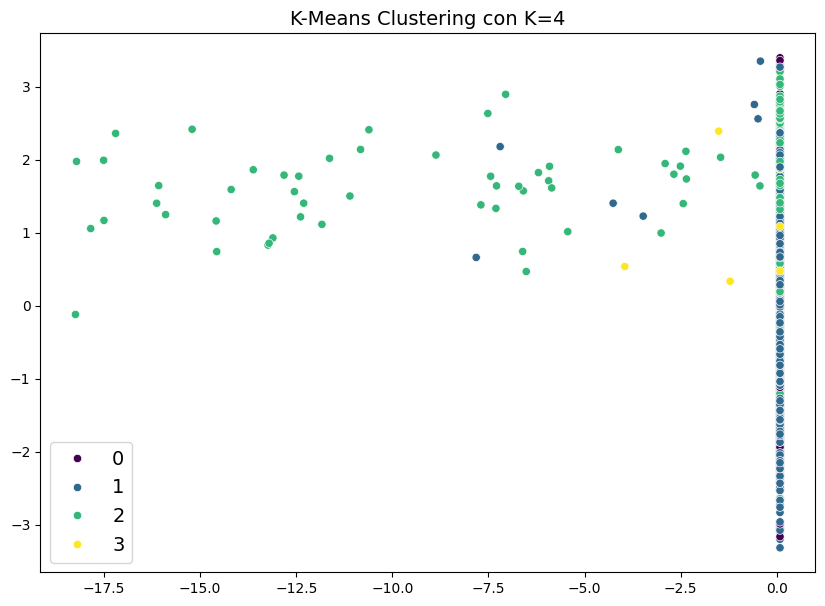

In [174]:
# Número óptimo de clusters basado en el gráfico del Silhouette Score
optimal_k = 4  # Basado en el gráfico

# Aplicar K-Means con el número óptimo de clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_optimal.fit(X_scaled)

# Etiquetas de los clusters
kmeans_labels = kmeans_optimal.labels_

# Evaluación del Modelo con Silhouette Score y Adjusted Rand Index
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_ari = adjusted_rand_score(data_cleaned['Species'], kmeans_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"K-Means Adjusted Rand Index: {kmeans_ari}")

# Visualización de los clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='viridis')
plt.title(f'K-Means Clustering con K={optimal_k}')
plt.show()


Aunque los clusters están separados, es evidente que hay solapamiento entre ellos, lo que puede indicar que los datos no se agrupan de forma claramente distinguible con K=4.

####3.2 Aplicación de DBSCAN



#####Optimizamos los parametros eps y min_samples para DBSCAN

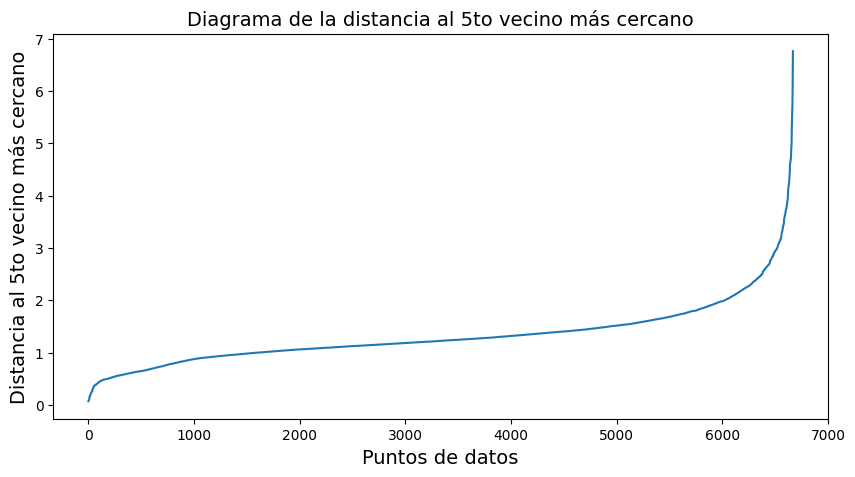

In [175]:
from sklearn.neighbors import NearestNeighbors

# Utilizar el diagrama de la distancia al k-ésimo vecino más cercano para determinar eps
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, 4], axis=0)  # Distancia al 5to vecino más cercano

plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.xlabel('Puntos de datos')
plt.ylabel('Distancia al 5to vecino más cercano')
plt.title('Diagrama de la distancia al 5to vecino más cercano')
plt.show()


A partir del diagrama de la distancia al k-ésimo vecino más cercano, podemos observar que el valor de eps podría estar en el rango de 1.0 a 1.5, ya que es donde comienza a haber una pendiente más pronunciada. Vamos a ajustar eps en este rango y min_samples en valores de 5, 10 y 15, y procederemos con la optimización.

In [176]:
eps_values = [1.0, 1.1, 1.2, 1.3, 1.4, 1.5]  #Basado en el grafico anterior
min_samples_values = [5, 10, 15]

best_silhouette = -1
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)

        if len(set(labels)) > 1:  # Evitar casos donde solo hay un cluster
            silhouette_avg = silhouette_score(X_scaled, labels)
            print(f"eps: {eps}, min_samples: {min_samples}, Silhouette Score: {silhouette_avg}")

            if silhouette_avg > best_silhouette:
                best_silhouette = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples

print(f"Mejores valores - eps: {best_eps}, min_samples: {best_min_samples}, Silhouette Score: {best_silhouette}")


eps: 1.0, min_samples: 5, Silhouette Score: -0.35677453873949694
eps: 1.0, min_samples: 10, Silhouette Score: -0.29860431692745387
eps: 1.0, min_samples: 15, Silhouette Score: -0.30912740514427206
eps: 1.1, min_samples: 5, Silhouette Score: -0.2600377876683282
eps: 1.1, min_samples: 10, Silhouette Score: -0.2574107926513649
eps: 1.1, min_samples: 15, Silhouette Score: -0.2716555550922794
eps: 1.2, min_samples: 5, Silhouette Score: -0.20766238593636308
eps: 1.2, min_samples: 10, Silhouette Score: -0.11667442644577304
eps: 1.2, min_samples: 15, Silhouette Score: -0.16128880189196518
eps: 1.3, min_samples: 5, Silhouette Score: 0.002730024192423348
eps: 1.3, min_samples: 10, Silhouette Score: -0.09587197777933258
eps: 1.3, min_samples: 15, Silhouette Score: -0.12255315773388019
eps: 1.4, min_samples: 5, Silhouette Score: 0.057831708462998864
eps: 1.4, min_samples: 10, Silhouette Score: 0.07973212116072478
eps: 1.4, min_samples: 15, Silhouette Score: 0.09498295471459019
eps: 1.5, min_sample

#####Aplicacion de parametros optimizacods

In [177]:
# Aplicar DBSCAN con los mejores parámetros
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Evaluación del Modelo con Silhouette Score y Adjusted Rand Index
dbscan_silhouette = silhouette_score(X_scaled, labels_dbscan)
dbscan_ari = adjusted_rand_score(data_cleaned['Species'], labels_dbscan)

print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
print(f"DBSCAN Adjusted Rand Index: {dbscan_ari}")



DBSCAN Silhouette Score: 0.13961627452886355
DBSCAN Adjusted Rand Index: 0.7337205529545181


###Paso 4: Evaluación y Análisis de Resultados


####Visualización de los Clusters

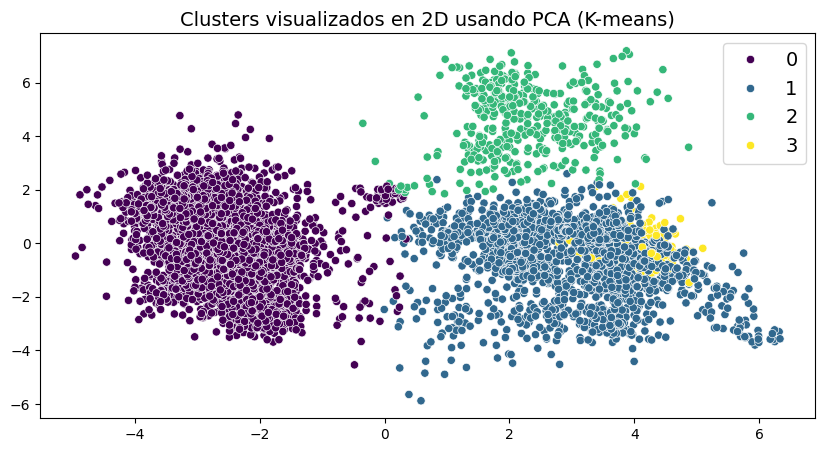

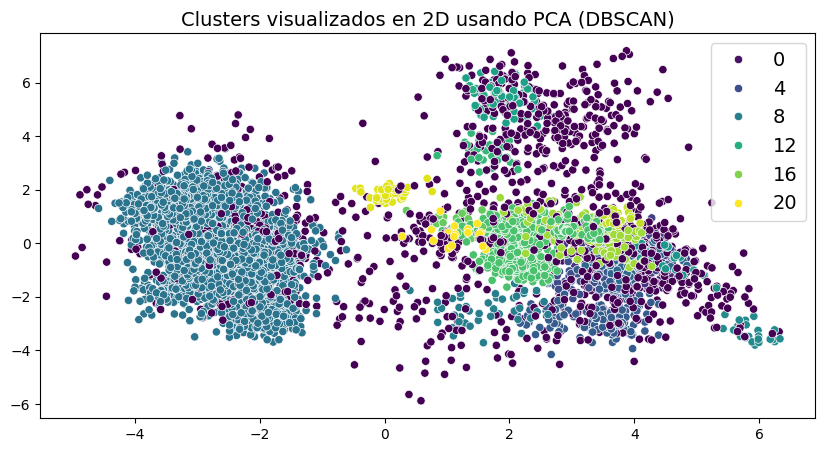

In [178]:
# Reducción de dimensionalidad usando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualización de los clusters en 2D usando PCA para K-means
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_kmeans, palette='viridis')
plt.title('Clusters visualizados en 2D usando PCA (K-means)')
plt.show()

# Visualización de los clusters en 2D usando PCA para DBSCAN
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_dbscan, palette='viridis')
plt.title('Clusters visualizados en 2D usando PCA (DBSCAN)')
plt.show()


**Clustering con K-Means**

* Número de Clusters:

La visualización en 2D utilizando PCA muestra que K-Means con K=4 produce clusters relativamente bien definidos. Los clusters están claramente separados en el espacio reducido de dos dimensiones, aunque no están completamente separados.
K-Means parece formar clusters con buena cohesión, especialmente uno grande y bien definido (cluster 0 en color púrpura).

**Clustering con DBSCAN**

* Parámetros Optimizados:

Utilizamos un eps = 0.8 y min_samples de 5 basándonos en el diagrama de la distancia al 5to vecino más cercano. Estos parámetros parecen apropiados para nuestro dataset después de observar el "codo" en el diagrama.

* Visualización y Número de Clusters:

La visualización en 2D utilizando PCA para DBSCAN muestra que el algoritmo identificó varios clusters, aunque algunos de ellos pueden ser muy pequeños.
DBSCAN también identificó varias áreas densas (clusters) y puntos dispersos (ruido). Los clusters formados son más variados en número y tamaño comparados con K-Means.

* Evaluación con Silhouette Score:

El Silhouette Score para DBSCAN fue negativo, lo que sugiere que algunos puntos pueden estar mal asignados a clusters o etiquetados como ruido. Esto puede ser debido a la naturaleza de DBSCAN de no forzar a cada punto a pertenecer a un cluster.

**Conclusiones Generales**
K-Means parece funcionar mejor en términos de cohesión de clusters y separabilidad en este dataset particular, aunque está limitado por la asunción de clusters esféricos.
DBSCAN ofrece flexibilidad al no asumir ninguna forma de cluster, pero su rendimiento puede depender mucho de la selección de hiperparámetros y puede ser sensible a datos con densidades muy variables.

####Comparación con Ground Truth

In [179]:
# Crear un diccionario para mapear familias, géneros y especies a números
family_mapping = {label: idx for idx, label in enumerate(data_cleaned['Family'].unique())}
genus_mapping = {label: idx for idx, label in enumerate(data_cleaned['Genus'].unique())}
species_mapping = {label: idx for idx, label in enumerate(data_cleaned['Species'].unique())}

# Aplicar el mapeo a las etiquetas originales
Y_mapped = data_cleaned[['Family', 'Genus', 'Species']].copy()
Y_mapped['Family'] = data_cleaned['Family'].map(family_mapping)
Y_mapped['Genus'] = data_cleaned['Genus'].map(genus_mapping)
Y_mapped['Species'] = data_cleaned['Species'].map(species_mapping)

# Matriz de confusión para K-means
conf_matrix_family_kmeans = confusion_matrix(Y_mapped['Family'], labels_kmeans)
print("Confusion Matrix for Family (K-means):")
print(conf_matrix_family_kmeans)

conf_matrix_genus_kmeans = confusion_matrix(Y_mapped['Genus'], labels_kmeans)
print("Confusion Matrix for Genus (K-means):")
print(conf_matrix_genus_kmeans)

conf_matrix_species_kmeans = confusion_matrix(Y_mapped['Species'], labels_kmeans)
print("Confusion Matrix for Species (K-means):")
print(conf_matrix_species_kmeans)

# Matriz de confusión para DBSCAN
conf_matrix_family_dbscan = confusion_matrix(Y_mapped['Family'], dbscan_labels)
print("Confusion Matrix for Family (DBSCAN):")
print(conf_matrix_family_dbscan)

conf_matrix_genus_dbscan = confusion_matrix(Y_mapped['Genus'], dbscan_labels)
print("Confusion Matrix for Genus (DBSCAN):")
print(conf_matrix_genus_dbscan)

conf_matrix_species_dbscan = confusion_matrix(Y_mapped['Species'], dbscan_labels)
print("Confusion Matrix for Species (DBSCAN):")
print(conf_matrix_species_dbscan)

Confusion Matrix for Family (K-means):
[[3433  440    5  366]
 [   0  482    0    2]
 [  87 1357  421   15]
 [   0   58    1    1]]
Confusion Matrix for Genus (K-means):
[[3432  221    3  354    0    0    0    0]
 [   0  482    0    2    0    0    0    0]
 [  43  214    0    1    0    0    0    0]
 [   9 1011  384   11    0    0    0    0]
 [   1  219    2   12    0    0    0    0]
 [   0   68   18    2    0    0    0    0]
 [   0   58    1    1    0    0    0    0]
 [  35   64   19    1    0    0    0    0]]
Confusion Matrix for Species (K-means):
[[   0  220    3  354    0    0    0    0    0    0]
 [   0  482    0    2    0    0    0    0    0    0]
 [3432    1    0    0    0    0    0    0    0    0]
 [  43  214    0    1    0    0    0    0    0    0]
 [   0    2  364   10    0    0    0    0    0    0]
 [   9 1009   20    1    0    0    0    0    0    0]
 [   1  219    2   12    0    0    0    0    0    0]
 [   0   68   18    2    0    0    0    0    0    0]
 [   0   58    1    1

**Análisis de las Matrices de Confusión para K-means:**
* Family:
La mayor parte de los puntos están agrupados en el primer cluster (3433) y el tercer cluster (1357).
La confusión entre los clusters sugiere que K-means agrupa datos de diferentes familias en los mismos clusters.
* Genus:
Los resultados indican una agrupación menos precisa, ya que los datos de diferentes géneros están mezclados en los mismos clusters.
* Species:
Es evidente que K-means no es capaz de diferenciar claramente entre todas las especies.

**Análisis de las Matrices de Confusión para DBSCAN:**
* Family:
Los resultados de DBSCAN muestran una gran dispersión de datos en muchos clusters, con un gran número de puntos en el cluster de ruido (-1).
Los clusters más significativos son los 0, 4, y 8, pero no están bien definidos para todas las familias.
* Genus:
Similar a la familia, hay una dispersión significativa y muchos puntos en el cluster de ruido.
Los clusters 0, 4, y 8 son los más prominentes, pero aún muestran una mezcla considerable de géneros.
* Species:
La mayoría de los puntos están en el cluster de ruido o dispersos en pequeños clusters.

**Conclusiones:**
* K-means:
K-means tiende a agrupar datos de diferentes familias, géneros, y especies en los mismos clusters, lo que indica que las características utilizadas no diferencian bien entre las diferentes clases.
La homogeneidad dentro de los clusters es baja, lo que sugiere que K-means no es el mejor algoritmo para estos datos.
* DBSCAN:
DBSCAN muestra una gran cantidad de datos como ruido, lo cual es indicativo de que muchos puntos no se agrupan bien según el criterio de densidad.
Los clusters formados son pequeños y dispersos, lo que también indica una pobre correspondencia con las etiquetas originales.

###Visualizacion en 3D utilizando 3 caracteristicas

Debido a que los resultados no reflejan completamente los resultados vamos a hacer un estudio utilizando una reducción a 3 caracteristicas

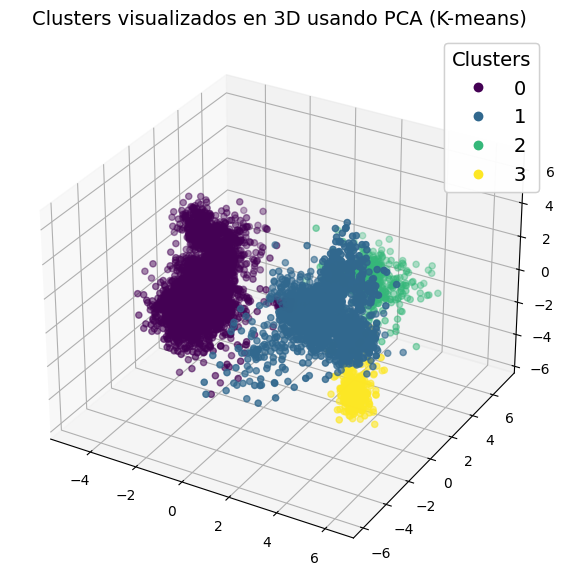

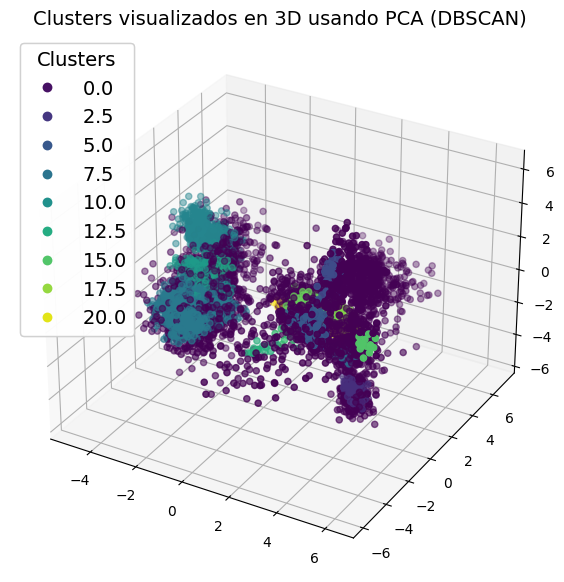

Confusion Matrix for Family (K-means):
[[3433  440    5  366]
 [   0  482    0    2]
 [  87 1357  421   15]
 [   0   58    1    1]]
Confusion Matrix for Genus (K-means):
[[3432  221    3  354    0    0    0    0]
 [   0  482    0    2    0    0    0    0]
 [  43  214    0    1    0    0    0    0]
 [   9 1011  384   11    0    0    0    0]
 [   1  219    2   12    0    0    0    0]
 [   0   68   18    2    0    0    0    0]
 [   0   58    1    1    0    0    0    0]
 [  35   64   19    1    0    0    0    0]]
Confusion Matrix for Species (K-means):
[[   0  220    3  354    0    0    0    0    0    0]
 [   0  482    0    2    0    0    0    0    0    0]
 [3432    1    0    0    0    0    0    0    0    0]
 [  43  214    0    1    0    0    0    0    0    0]
 [   0    2  364   10    0    0    0    0    0    0]
 [   9 1009   20    1    0    0    0    0    0    0]
 [   1  219    2   12    0    0    0    0    0    0]
 [   0   68   18    2    0    0    0    0    0    0]
 [   0   58    1    1

In [180]:


# Aplicación de DBSCAN con los parámetros óptimos ajustados
dbscan = DBSCAN(eps=1.2, min_samples=10)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Reducción de dimensionalidad usando PCA
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_scaled)

# Visualización de los clusters en 3D usando PCA para K-means
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=kmeans_labels, cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_title('Clusters visualizados en 3D usando PCA (K-means)')
plt.show()

# Visualización de los clusters en 3D usando PCA para DBSCAN
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=labels_dbscan, cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_title('Clusters visualizados en 3D usando PCA (DBSCAN)')
plt.show()

# Crear un diccionario para mapear familias, géneros y especies a números
family_mapping = {label: idx for idx, label in enumerate(data['Family'].unique())}
genus_mapping = {label: idx for idx, label in enumerate(data['Genus'].unique())}
species_mapping = {label: idx for idx, label in enumerate(data['Species'].unique())}

# Aplicar el mapeo a las etiquetas originales
Y_mapped = data_cleaned[['Family', 'Genus', 'Species']].copy()
Y_mapped['Family'] = data_cleaned['Family'].map(family_mapping)
Y_mapped['Genus'] = data_cleaned['Genus'].map(genus_mapping)
Y_mapped['Species'] = data_cleaned['Species'].map(species_mapping)

# Matriz de confusión para K-means
conf_matrix_family_kmeans = confusion_matrix(Y_mapped['Family'], kmeans_labels)
print("Confusion Matrix for Family (K-means):")
print(conf_matrix_family_kmeans)

conf_matrix_genus_kmeans = confusion_matrix(Y_mapped['Genus'], kmeans_labels)
print("Confusion Matrix for Genus (K-means):")
print(conf_matrix_genus_kmeans)

conf_matrix_species_kmeans = confusion_matrix(Y_mapped['Species'], kmeans_labels)
print("Confusion Matrix for Species (K-means):")
print(conf_matrix_species_kmeans)

# Matriz de confusión para DBSCAN
conf_matrix_family_dbscan = confusion_matrix(Y_mapped['Family'], labels_dbscan)
print("Confusion Matrix for Family (DBSCAN):")
print(conf_matrix_family_dbscan)

conf_matrix_genus_dbscan = confusion_matrix(Y_mapped['Genus'], labels_dbscan)
print("Confusion Matrix for Genus (DBSCAN):")
print(conf_matrix_genus_dbscan)

conf_matrix_species_dbscan = confusion_matrix(Y_mapped['Species'], labels_dbscan)
print("Confusion Matrix for Species (DBSCAN):")
print(conf_matrix_species_dbscan)



**Análisis de Resultados de Clustering en 3D con PCA**
* Visualización en 3D usando PCA para K-means:

  *  Distribución de Clusters:
  Los clusters están mejor separados en el espacio 3D comparado con la visualización en 2D.
Hay una mayor claridad en la separación de los clusters, lo que sugiere que las características adicionales capturadas en el tercer componente principal ayudan a distinguir mejor los grupos.

* Visualización en 3D usando PCA para DBSCAN:

  * Distribución de Clusters:
    Los resultados de DBSCAN muestran muchos más clusters pequeños y un gran número de puntos clasificados como ruido (-1).
    La estructura de los clusters en 3D muestra una mayor dispersión en comparación con K-means.


**Comparación entre PCA 2D y PCA 3D:**

- Separación de Clusters:

En PCA 3D, la separación de los clusters es más clara en ambas técnicas de clustering (K-means y DBSCAN), lo que indica que las características adicionales proporcionan información valiosa para la diferenciación de los grupos, cuantas mas caracteristicas, mejor clasificación

- Interpretación de Resultados:

  1. K-means en PCA 3D muestra una estructura de clusters más definida en comparación con PCA 2D.
DBSCAN en PCA 3D sigue mostrando una mayor cantidad de clusters y puntos de ruido, lo que sugiere que esta técnica es más sensible a la estructura local de los datos.
Conclusiones:

  2. La visualización en 3D proporciona una mejor separación y una visión más clara de la estructura de los datos.

  3. K-means parece proporcionar clusters más grandes y claramente definidos, mientras que DBSCAN identifica clusters más pequeños y dispersos, con muchos puntos de ruido.

## <font color='blue'>Ejercicio 3. DETECCIÓN de ANOMALÍAS con PyOD



### <font color='blue'> Ejemplo de uso de IsolationForest en un conjunto sintético.

<font color='blue'>A continuación, se muestra un ejemplo de uso de IsolationForest (https://pyod.readthedocs.io/en/latest/_modules/pyod/models/iforest.html) en un conjunto sintético. PyOD ofrece un wrapper del Isolation Forest de scikit-learn (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) con más funcionalidades.

#### <font color='blue'>Paso 1: Construimos el Modelo

<font color='blue'>Generamos $6$ variables y $500$ instancias para entrenamiento y test. Aunque los datos tienen la variable target $Y$, los modelos no supervisados solo usarán las variables $X$. La variable $Y$ es solo para validación. El porcentaje de outliers se pone al $5\%$ con `contamination=0.05`. Se dibuja un scatter plot de las dos primeras variables. Los puntos amarillos son outliers, y los puntos violeta son los datos normales.

In [181]:
!pip install pyod

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyod.utils.data import generate_data
contamination = 0.05 # percentage of outliers
n_train = 500       # number of training points
n_test = 500        # number of testing points
n_features = 6      # number of features
X_train, X_test, y_train, y_test = generate_data(
    n_train=n_train,
    n_test=n_test,
    n_features= n_features,
    contamination=contamination,
    random_state=123)

X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()

0         1         2         3         4         5
0  2.396090  2.092611  2.073392  1.988262  1.953473  2.450997
1  1.631040  1.746182  1.898050  2.380148  1.967332  1.858916
2  1.824683  2.131412  2.028829  1.703454  2.502966  2.119108
3  2.106098  2.165173  2.340826  2.170109  1.749139  1.678661
4  1.829647  1.775596  1.829438  2.054768  1.577190  1.594549

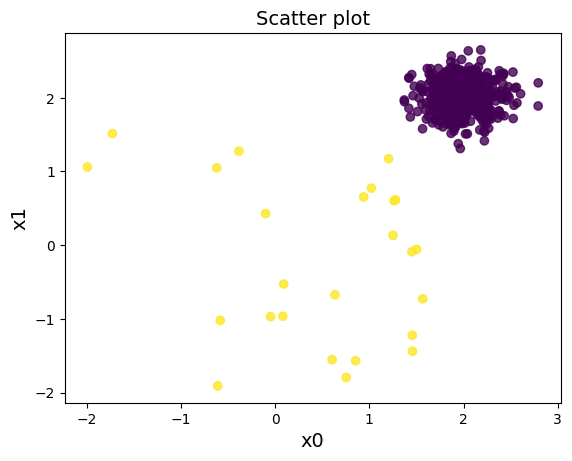

In [182]:
plt.scatter(X_train_pd[0], X_train_pd[1],c=y_train, alpha=0.8)
plt.title('Scatter plot')
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

<font color='blue'>Declaramos y ajustamos el modelo. El tamaño de un árbol `max_samples`es de $40$ instancias. En Isolation Forest (IForest, https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.iforest), no es necesario asignar un tamaño de árbol grande, puesto que tamaños pequeños pueden producir mejores iTrees. El porcentaje de outliers será $5\%$ usando `contamination=0.05`. Si no se indica, este valor se fijará automáticamente en $10\%$.

<font color='blue'>La función `decision_function()` genera el _outlier score_ de cada ejemplo del conjunto de datos, y la función `predict()` assigna las etiquetas ($1$: outlier; $0$: no outlier) basándose en la tasa de contaminación proporcionada ($5\%$ en nuestro caso). El umbral que vemos más abajo (`threshold_`) se emplea para identificar los `n_samples*contamination` ejemplos más atípicos de acuerdo a su `decision_scores_`.

In [183]:
from pyod.models.iforest import IForest
isft = IForest(contamination=0.05, max_samples=40, behaviour='new')
isft.fit(X_train)

# Training data
y_train_scores = isft.decision_function(X_train)
y_train_pred = isft.predict(X_train)

# Test data
y_test_scores = isft.decision_function(X_test)
y_test_pred = isft.predict(X_test) # outlier labels (0 or 1)

# Threshold for the defined comtanimation rate
print("The threshold for the defined contamination rate:" , isft.threshold_)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic.
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred))
print("The training data:", count_stat(y_test_pred))


The threshold for the defined contamination rate: -5.056718932472393e-15
The training data: {0: 475, 1: 25}
The training data: {0: 472, 1: 28}


<font color='blue'> Vemos que, efectivamente, este número de ejemplos más atípicos se corresponde con `X_train.shape[0]*0.05`.

In [184]:
X_train.shape[0]*0.05

25.0

<font color='blue'> Vamos a intentar marcar con una cruz roja los $25$ ejemplos más atípicos en la figura.  

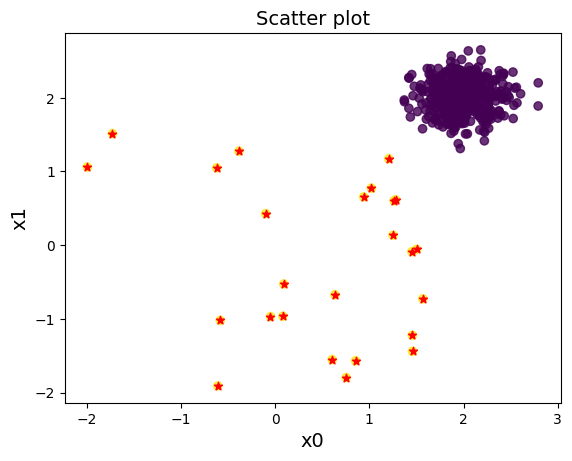

In [185]:
plt.scatter(X_train_pd[0], X_train_pd[1],c=y_train, alpha=0.8)
indexes = np.squeeze(np.array(np.where(isft.threshold_ < isft.decision_scores_)))
plt.scatter(X_train[indexes,0], X_train[indexes,1],marker='*',color='r')
plt.title('Scatter plot')
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

##### <font color='blue'>Paso 1.1: Parámetros del Modelo

In [186]:
isft.get_params()

{'behaviour': 'new',
 'bootstrap': False,
 'contamination': 0.05,
 'max_features': 1.0,
 'max_samples': 40,
 'n_estimators': 100,
 'n_jobs': 1,
 'random_state': None,
 'verbose': 0}

* <font color='blue'>`max_samples` es el número de muestras a escoger en $X$ para entrenar cada estimador base.
* <font color='blue'>`n_estimators` es el número de árboles en el ensemble. El valor por defecto es de 100 árboles.
* <font color='blue'>`max_features` es el número de características a escoger en $X$ para entrenar cada estimador base. El valor por defecto es $1.0$.
* <font color='blue'>`n_jobs` es el número de tareas a ejecutar en paralelo para `fit`y `predict`. El valor por defecto es $1.0$. Si se pone a $-1$, el número de tareas se iguala al número de cores.

##### <font color='blue'>Paso 1.2: Importancia de las Variables

<font color='blue'>Debido a que IForest trabaja dentro del marco de los árboles de decisión, podemos calcular y entender la importancia relativa de las características para determinar outliers. La importancia de las características se mide por el [índice de impureza Gini](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity), cuya suma es $1.0$. A mayor valor, mayor importancia tiene la característica. En nuestro caso, la primera (índice $0$) y quinta (índice $4$) características serían las más relevantes.

In [187]:
isft_vi = isft.feature_importances_
isft_vi

array([0.19591517, 0.16455252, 0.16762911, 0.16028884, 0.15706946,
       0.1545449 ])

In [188]:
np.sum(isft_vi)

1.0

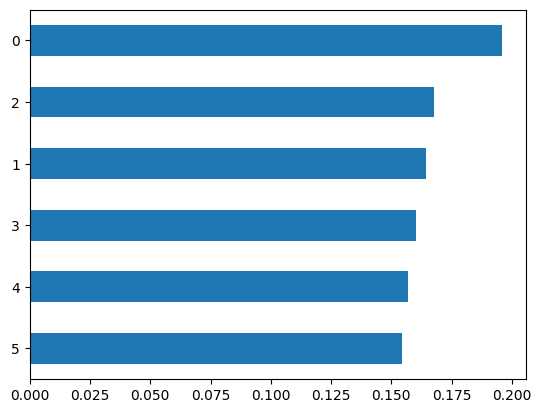

In [189]:
from matplotlib import pyplot as plt
for_plot = pd.DataFrame({'x_axis':X_train_pd.columns, 'y_axis':isft_vi}).sort_values(by='y_axis',ascending=True)
for_plot['y_axis'].plot.barh();

####<font color='blue'> Paso 2: Determinar un Umbral Razonable

<font color='blue'>El umbral se puede determinar por el histograma de los _outlier scores_. La siguiente figura sugiere un umbral alrededor de $0.0$. Esto significa que los scores de la mayoría de los datos normales son menores que $0.0$. Los scores de outlier de los datos anormales están en un rango más alto.

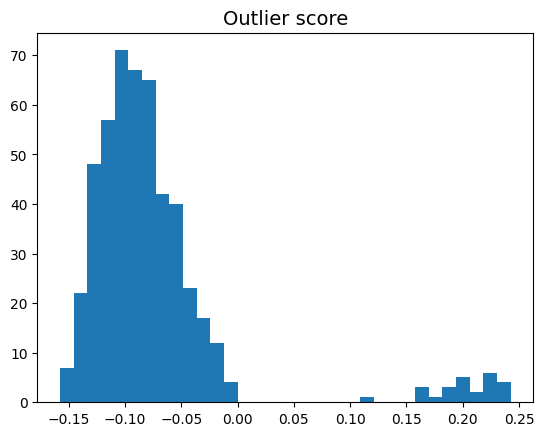

In [190]:
import matplotlib.pyplot as plt
plt.hist(y_train_scores, bins='auto') # arguments are passed to np.histogram
plt.title("Outlier score")
plt.show()

#### <font color='blue'>Paso 3: análisis estadístico descriptivo

<font color='blue'>Realicemos un análisis descriptivo de los grupos normal y outlier tanto en entrenamiento como en test. En esta ocasión utilizamos directamente el threshold calculado por Isolation Forest, pero debemos ser conscientes de que podemos emplear el valor que consideremos más oportuno (en base al histograma anterior o a cualquier otra información de que dispongamos). Dicho umbral hará que cambien las tablas que se muestran a continuación. Por ejemplo, si hacemos `threshold = isft.threshold_ - 0.05` veremos que se incrementa el porcentaje de ejemplos considerados outliers (pasando del $5\%$ al $11.2\%$).

In [191]:
threshold = isft.threshold_ # Or other value from the above histogram

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(3).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X_train,y_train_scores, threshold) #y_train_scores = isft.decision_scores_

Group  Count  Count %      0      1      2      3      4      5  \
0   Normal    475     95.0  2.003  2.011  2.006  1.991  2.008  1.985   
1  Outlier     25      5.0  0.454 -0.209 -0.475 -0.231 -0.035 -0.056   

   Anomaly_Score  
0         -0.089  
1          0.204

In [192]:
descriptive_stat_threshold(X_test,y_test_scores, threshold)

Group  Count  Count %      0      1      2      3      4      5  \
0   Normal    472     94.4  2.016  2.012  2.009  1.989  2.004  2.001   
1  Outlier     28      5.6  0.227 -0.244  0.033  0.155  0.192  0.324   

   Anomaly_Score  
0         -0.087  
1          0.180

In [193]:
X_train[y_train==1,0].mean()

0.4535480626515198

<font color='blue'>Las tablas de arriba incluyen los elementos esenciales para la evaluación del modelo e interpretación de resultados.

* <font color='blue'>Tamaño del grupo de outlier (`Count %`) de las tablas. Muestra un $5\%$ en cada caso ($5.2\%$ en test). Es importante recordar que el tamaño del grupo de outliers viene determinado por el threshold, que a su vez se calcula en base a la contaminación proporcionada.
* <font color='blue'>La media del score de anomalía. En las tablas, la media del score del grupo de outlier es más grande que la del grupo normal, lo que confirma que el grupo  outlier debería tener y tiene mayores scores de anomalía.
* <font color='blue'>Estadísticas relativas a las variable de entrada agrupadas en normales (grupo $0$) y atípicas (grupo $1$). Por ejemplo, el valor asociado con la columna $0$ y fila $0$ (normal) se corresponde con `X_train[y_train==0,0].mean()`, es decir, $2.003$. La segunda fila (grupo $1$) de la misma columna sería `X_train[y_train==1,0].mean()`, es decir, $0.454$. Se puede observar que la media de las características en el grupo de outliers son más pequeñas que en el grupo de ejemplos normales. Si esto tiene sentido o no depende del problema en cuestión.


<font color='blue'>Debido a que tenemos el ground truth en nuestros datos, podemos generar una matriz de confusión para entender el rendimiento del modelo.

In [194]:
def confusion_matrix_threshold(
    actual,score, threshold):
    Actual_pred = pd.DataFrame({'Actual': actual, 'Pred': score})
    Actual_pred['Pred'] = np.where(Actual_pred['Pred']<=threshold,0,1)
    cm = pd.crosstab(Actual_pred['Actual'],Actual_pred['Pred'])
    return (cm)

confusion_matrix_threshold(y_train,y_train_scores,threshold)

Pred      0   1
Actual         
0.0     475   0
1.0       0  25

### <font color='blue'>Ejercicio.

<font color='blue'>Tras el ejemplo anterior, ahora presentamos el ejercicio a resolver por el alumnado en relación a la detección de anomalías con PyOD (https://pyod.readthedocs.io/en/latest/). En concreto, los estudiantes trabajarán con el conjunto de datos _Statlog_ (satélite Landsat) del repositorio de aprendizaje automático de la UCI (https://odds.cs.stonybrook.edu/satellite-dataset/). Se trata de un conjunto de datos de clasificación multiclase, en donde se combinan las tres clases más pequeñas para formar la clase de valores atípicos. En PRADO el alumnado dispone del fichero `satellite.mat` con los datos necesarios para realizar el ejercicio. A continuación se aporta una descripción general del dataset:
* <font color='blue'> $X$ = datos puntuales multidimensionales,
* <font color='blue'> $y$ = etiquetas ($1$ = valores atípicos, $0$ = valores atípicos).
* <font color='blue'> $6435$ instancias, $36$ características y $2036$ ($32\%$) anomalías. Este último número se puede recuperar haciendo `np.sum(Y==1)`.

<font color='blue'> Referencias:
* <font color='blue'>  Liu, Fei Tony, Kai Ming Ting, and Zhi-Hua Zhou. “Isolation forest.” 2008 Eighth IEEE International Conference on Data Mining. IEEE, 2008.
* <font color='blue'>  K. M. Ting, J. T. S. Chuan, and F. T. Liu. “Mass: A New Ranking Measure for Anomaly Detection.“, IEEE Transactions on Knowledge and Data Engineering, 2009.




## <font color='blue'> Objetivos
    
<font color='blue'> El objetivo del presente ejercicio es analizar los patrones subyacentes a los datos, sin tomar en cuenta su _ground truth_, y determinar si las anomalías que se detectan con algoritmos avanzados coinciden con la realidad. Se debe usar un algoritmo cualquiera de la librería PyOD (https://github.com/yzhao062/pyod), como podría ser Isolation Forest. Se valorará positivamente que el estudiante escoga un algoritmo diferente, en cuyo caso, se proporcionará una breve explicación de su funcionamiento.

<font color='blue'> Para llevar a cabo este objetivo principal se llevarán a cabo los siguientes objetivos secundarios:
1. <font color='blue'> Realización de un análisis exploratorio para una primera observación de las distribuciones de los datos.
2. Construcción y ajuste del modelo.
3. Experimentación y determinación de los umbrales más razonables para la identificación de anomalías.
4. Comprobación de errores usando la información Ground Truth del conjunto de datos.

### <font color='blue'> Resultados Esperados
<font color='blue'> Se espera que los resultados que se obtengan de la detección de anomalías sean razonablemente parecidos a la realidad.
    
<font color='blue'>Como el fichero es un `.mat` (matlab), lo primero que haremos será tranformarlo en `.csv` para trabajar con él. Nos quedamos solo con la parte no supervisada (es decir, con las entradas, sin las salidas deseadas / etiquetas).

###Paso 1: Cargar y Explorar los Datos


In [195]:
import scipy.io
import pandas as pd

from google.colab import drive
drive.mount("/content/drive/")

dataFolder = 'drive/MyDrive/Colab Notebooks/clustering/'

# Cargar el archivo .mat
mat = scipy.io.loadmat(dataFolder + '/satellite.mat')
print(mat.keys())

X = mat['X']
Y = mat['y']

# Convertir a un DataFrame de pandas ignorando las etiquetas
# IMPORTANTE: estamos ante un problema no supervisado. No podemos emplear las etiquetas para agrupar o analizar los datos.
df = pd.DataFrame(X)

# Añadimos la columna de etiquetas para el análisis exploratorio
df['target'] = Y

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [196]:
df

0    1    2   3   4    5    6   7   8    9  ...   27  28   29   30  \
0     92  115  120  94  84  102  106  79  84  102  ...  104  88  121  128   
1     84  102  106  79  84  102  102  83  80  102  ...  100  84  107  113   
2     84  102  102  83  80  102  102  79  84   94  ...   87  84   99  104   
3     80  102  102  79  84   94  102  79  80   94  ...   79  84   99  104   
4     84   94  102  79  80   94   98  76  80  102  ...   79  84  103  104   
...   ..  ...  ...  ..  ..  ...  ...  ..  ..  ...  ...  ...  ..  ...  ...   
6430  60   83   96  85  64   87  100  88  64   83  ...   92  66   87  108   
6431  64   79  100  85  56   71   96  85  56   68  ...   85  66   83  100   
6432  56   68   91  81  56   64   91  81  53   64  ...   81  59   87   96   
6433  56   68   87  74  60   71   91  81  60   64  ...   74  59   83   92   
6434  60   71   91  81  60   64  104  99  56   64  ...   74  59   83   92   

       31  32   33   34  35  target  
0     100  84  107  113  87       0  
1      87  84   99  104  79       0  
2      79  84   99  104  79       0  
3      79  84  103  104  79       0  
4      79  79  107  109  87       0  
...   ...  ..  ...  ...  ..     ...  
6430   89  63   83  104  85       0  
6431   85  63   83  100  81       0  
6432   81  63   83   92  74       1  
6433   74  59   83   92  70       1  
6434   70  63   79  108  92       1  

[6435 rows x 37 columns]

###Paso 2: Análisis Exploratorio de Datos
Realizamos un análisis exploratorio para observar las distribuciones de los datos.

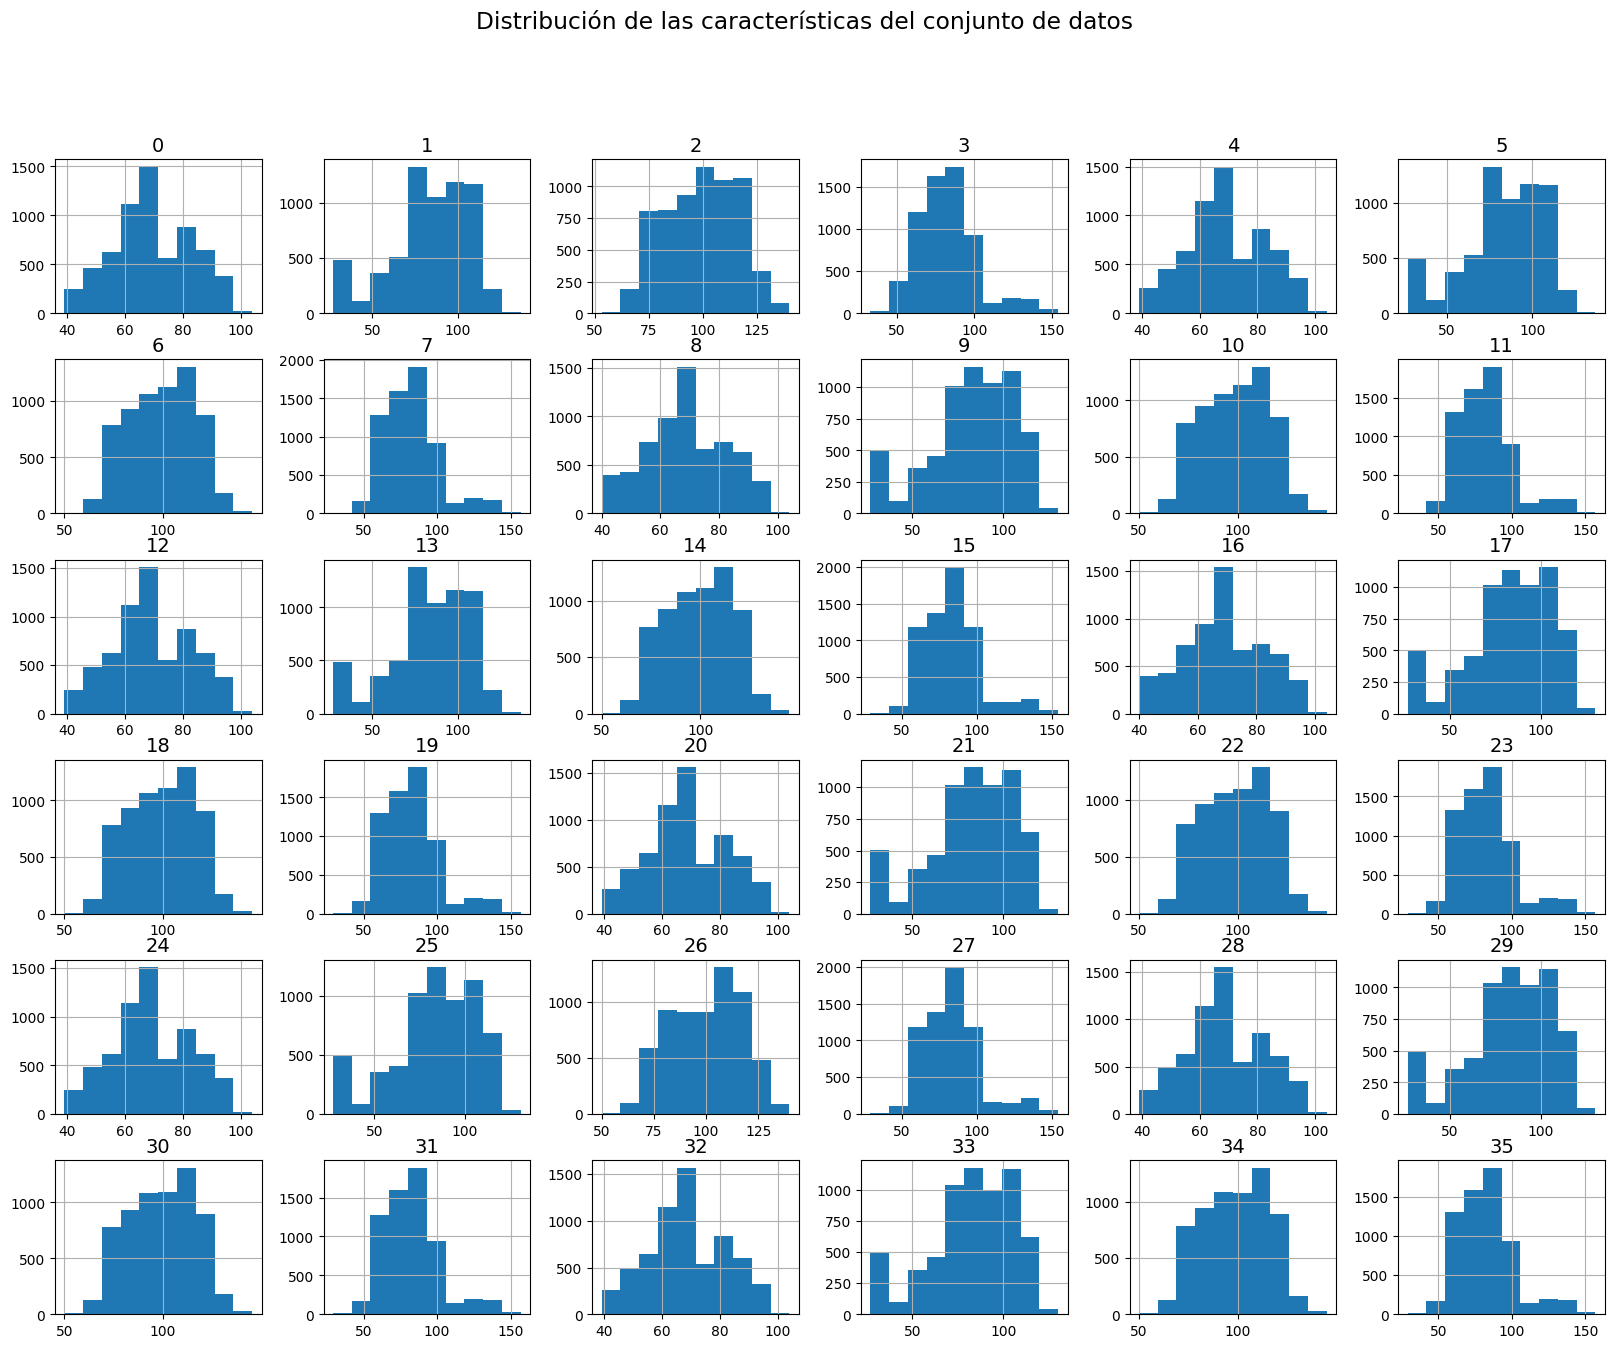

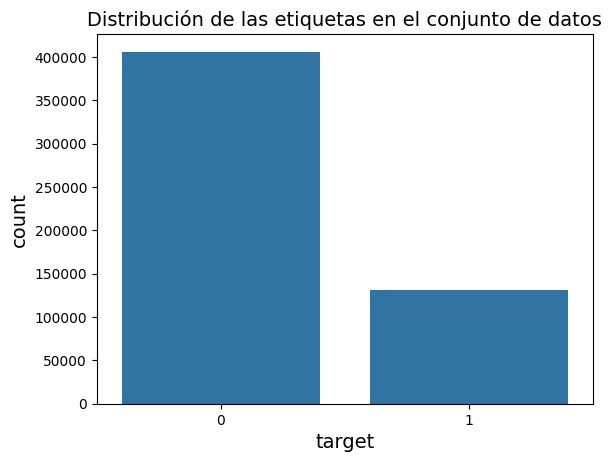

In [197]:
# Histograma de las características
df.iloc[:, :-1].hist(figsize=(20, 15))
plt.suptitle('Distribución de las características del conjunto de datos')
plt.show()

# Visualización de la distribución de las etiquetas
sns.countplot(x='target', data=df)
plt.title('Distribución de las etiquetas en el conjunto de datos')
plt.show()


* Equilibrio de Clases: Hay un desequilibrio significativo en las clases, con una mayoría de datos pertenecientes a la clase 0. Esto es importante para los modelos de detección de anomalías, ya que necesitamos asegurarnos de que nuestro modelo no solo se ajuste bien a la mayoría de los datos normales, sino que también sea capaz de detectar las anomalías efectivamente.

* Distribución de las Características: Las características parecen estar bien distribuidas, y no se observan outliers evidentes en las distribuciones univariantes.

###Paso 3: Construcción y Ajuste del Modelo
Usamos Isolation Forest para la detección de anomalías.

El umbral para la tasa de contaminación definida: -5.193370757852929e-19
Datos de entrenamiento: {0: 4376, 1: 2059}


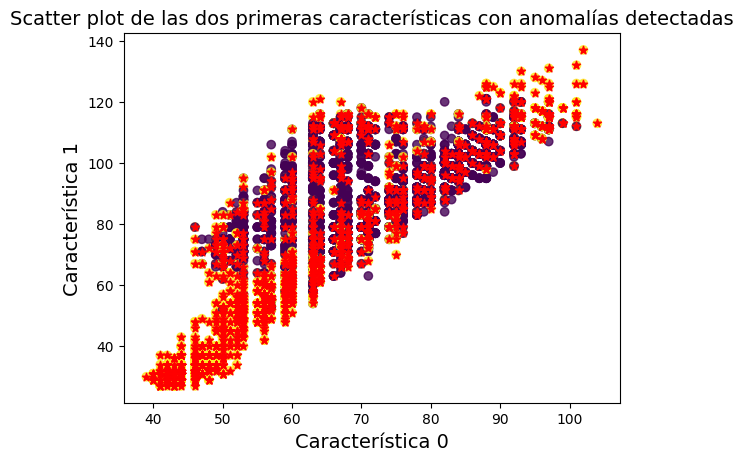

In [198]:
from pyod.models.iforest import IForest

# Configuración del modelo Isolation Forest
contamination = 0.32  # porcentaje de outliers según el dataset
isft = IForest(contamination=contamination, max_samples=256, random_state=42)

# Ajustar el modelo con los datos de entrenamiento
isft.fit(X)

# Predicciones y puntajes de decisión
y_pred = isft.predict(X)
y_scores = isft.decision_function(X)

# Threshold para la tasa de contaminación definida
threshold = isft.threshold_
print("El umbral para la tasa de contaminación definida:", threshold)

# Estadísticas de los datos de entrenamiento
def count_stat(vector):
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("Datos de entrenamiento:", count_stat(y_pred))

# Visualización de los resultados
plt.scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.8)
indexes = np.where(y_pred == 1)
plt.scatter(X[indexes, 0], X[indexes, 1], marker='*', color='r')
plt.title('Scatter plot de las dos primeras características con anomalías detectadas')
plt.xlabel('Característica 0')
plt.ylabel('Característica 1')
plt.show()


* Visualización de Anomalías

La gráfica muestra un scatter plot de las dos primeras características del conjunto de datos, con las anomalías detectadas por el modelo Isolation Forest marcadas con asteriscos rojos.

Observamos lo siguiente:

* Identificación de Anomalías:

El modelo ha identificado varias anomalías en el conjunto de datos, que están dispersas a lo largo de las dos primeras características.
Las anomalías detectadas no están concentradas en una sola región, lo que sugiere que hay diferentes patrones en los datos que el modelo considera como atípicos.

* Distribución de Datos Normales(morado):

Los puntos morados representan datos normales y se encuentran más concentrados en ciertas áreas, lo cual indica que el modelo ha identificado áreas de alta densidad de datos normales.


###Paso 4: Importancia de las Características y Determinación de Umbrales


####Importancia de las Características

Calculamos y mostramos la importancia de cada característica utilizando el índice de impureza Gini. Esto nos ayuda a entender qué características son más relevantes para la detección de anomalías.

Importancia de las características: [0.02427183 0.02651581 0.03240557 0.02810942 0.03166228 0.0290337
 0.03359418 0.02782083 0.02843504 0.02823497 0.03095245 0.02702263
 0.03077568 0.0227309  0.0258358  0.03026987 0.02635214 0.02936605
 0.02518986 0.02673877 0.02808669 0.02039065 0.02918118 0.02945074
 0.03421036 0.0280784  0.03081109 0.02760082 0.02582166 0.02372051
 0.02789946 0.03086971 0.02053761 0.02750931 0.02635053 0.02416348]


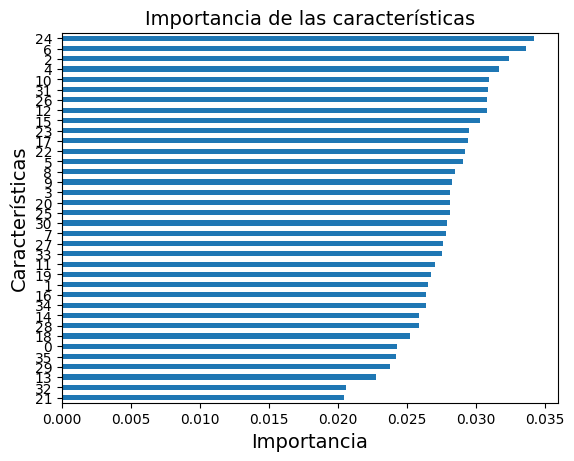

In [199]:
# Importancia de las características
isft_vi = isft.feature_importances_
print("Importancia de las características:", isft_vi)

# Visualización de la importancia de las características
for_plot = pd.DataFrame({'x_axis': range(len(isft_vi)), 'y_axis': isft_vi}).sort_values(by='y_axis', ascending=True)
for_plot['y_axis'].plot.barh()
plt.title('Importancia de las características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()


Las características más importantes para el modelo de Isolation Forest son la 24, 6 y 2.
Esto sugiere que estas características son las más influyentes en la determinación de anomalías en los datos.

####Determinación de Umbrales


Mostramos un histograma de los puntajes de outliers para determinar visualmente un umbral razonable.
Definimos el umbral basado en la tasa de contaminación configurada (en este caso, 32%).

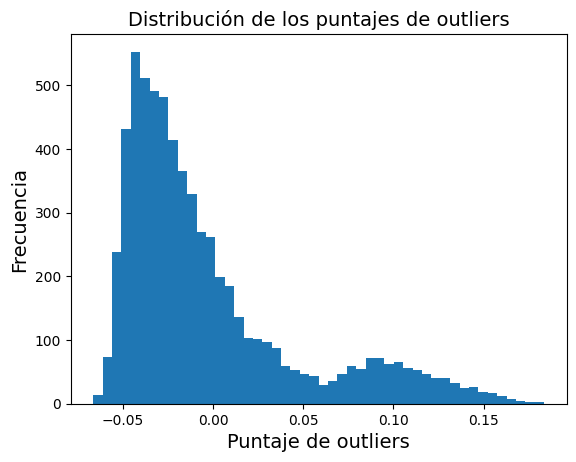

El umbral para la tasa de contaminación definida: -5.193370757852929e-19


In [200]:
# Histograma de los puntajes de outliers
plt.hist(y_scores, bins='auto')
plt.title("Distribución de los puntajes de outliers")
plt.xlabel("Puntaje de outliers")
plt.ylabel("Frecuencia")
plt.show()

# Definir umbral basado en el histograma
threshold = isft.threshold_
print("El umbral para la tasa de contaminación definida:", threshold)


Las estadísticas descriptivas muestran las diferencias entre las medias de las características para los datos normales y outliers.
Los outliers tienden a tener valores más extremos en varias características, lo que es consistente con su naturaleza de ser datos atípicos.

####Análisis Estadístico Descriptivo


Calculamos y mostramos estadísticas descriptivas para los grupos normales y atípicos en el conjunto de datos.
Generamos una matriz de confusión para evaluar el rendimiento del modelo.

In [201]:
from pyod.utils.data import generate_data

# Paso 3: Análisis estadístico descriptivo
def descriptive_stat_threshold(df, pred_score, threshold):
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score'] < threshold, 'Normal', 'Outlier')

    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score': 'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100
    stat = df.groupby('Group').mean().round(3).reset_index()
    stat = cnt.merge(stat, left_on='Group', right_on='Group')
    return stat

train_stat = descriptive_stat_threshold(X, y_scores, threshold)
print("Estadísticas descriptivas para los datos de entrenamiento:")
print(train_stat)

# Paso 4: Matriz de confusión
from sklearn.metrics import confusion_matrix

def confusion_matrix_threshold(actual, score, threshold):
    actual_pred = pd.DataFrame({'Actual': actual.flatten(), 'Pred': score.flatten()})
    actual_pred['Pred'] = np.where(actual_pred['Pred'] <= threshold, 0, 1)
    cm = pd.crosstab(actual_pred['Actual'], actual_pred['Pred'])
    return cm

cm_train = confusion_matrix_threshold(Y, y_scores, threshold)
print("Matriz de confusión para los datos de entrenamiento:")
print(cm_train)


Estadísticas descriptivas para los datos de entrenamiento:
     Group  Count    Count %       0       1        2       3       4       5  \
0   Normal   4376  68.003108  72.864  90.779   98.235  78.530  72.717  90.566   
1  Outlier   2059  31.996892  62.038  68.327  101.534  91.228  61.571  67.681   

         6  ...      27      28      29       30      31      32      33  \
0   98.022  ...  78.628  72.535  90.605   98.204  78.629  72.325  90.326   
1  101.424  ...  91.230  61.312  67.291  101.041  91.095  61.081  66.988   

        34      35  Anomaly_Score  
0   98.073  78.611         -0.030  
1  100.739  90.781          0.057  

[2 rows x 40 columns]
Matriz de confusión para los datos de entrenamiento:
Pred       0     1
Actual            
0       3580   819
1        796  1240


La matriz de confusión muestra que el modelo identificó correctamente una gran cantidad de anomalías y datos normales.


###Paso 5: Análisis y Visualización de Resultados

####Paso 5.1: Estadísticas Descriptivas Detalladas
Vamos a realizar un análisis más detallado de las estadísticas descriptivas para las características y los grupos de datos (normales y outliers).

In [202]:
def detailed_descriptive_stat(df, pred_score, threshold):
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score'] < threshold, 'Normal', 'Outlier')

    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score': 'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100

    mean_stat = df.groupby('Group').mean().reset_index()

    std_stat = df.groupby('Group').std().reset_index()

    return cnt, mean_stat, std_stat

train_cnt, train_mean_stat, train_std_stat = detailed_descriptive_stat(X, y_scores, threshold)
print("Conteo de los datos de entrenamiento:")
print(train_cnt)
print("\nMedia de los datos de entrenamiento:")
print(train_mean_stat)
print("\nDesviación estándar de los datos de entrenamiento:")
print(train_std_stat)


Conteo de los datos de entrenamiento:
     Group  Count    Count %
0   Normal   4376  68.003108
1  Outlier   2059  31.996892

Media de los datos de entrenamiento:
     Group          0          1           2          3          4          5  \
0   Normal  72.864031  90.778565   98.235146  78.529707  72.716636  90.566042   
1  Outlier  62.037882  68.327343  101.533754  91.227780  61.570665  67.680913   

            6          7          8  ...         27         28         29  \
0   98.021938  78.375000  72.408592  ...  78.628428  72.535192  90.605347   
1  101.424478  91.257892  61.481787  ...  91.230209  61.311802  67.291404   

           30         31         32         33          34         35  \
0   98.204068  78.629342  72.325411  90.326325   98.072898  78.611289   
1  101.041282  91.095192  61.081107  66.988344  100.739194  90.781447   

   Anomaly_Score  
0      -0.030212  
1       0.056705  

[2 rows x 38 columns]

Desviación estándar de los datos de entrenamiento:
     Grou

Distribución Desigual: Hay más datos normales (68%) que outliers (32%), lo cual es consistente con la naturaleza del problema de detección de anomalías.

Diferencias en Medias: Las medias de las características son significativamente diferentes entre los grupos de datos normales y outliers. Los outliers tienden a tener valores de características diferentes en comparación con los datos normales.

Mayor Variabilidad en Outliers: Las desviaciones estándar son mayores para los outliers, lo que sugiere una mayor variabilidad en sus características.

####Paso 5.2: Visualización 2D de las Anomalías
Para una visualización más completa de las anomalías, vamos a realizar una reducción de dimensionalidad usando PCA a 2 componentes principales y graficar los resultados en 2D.

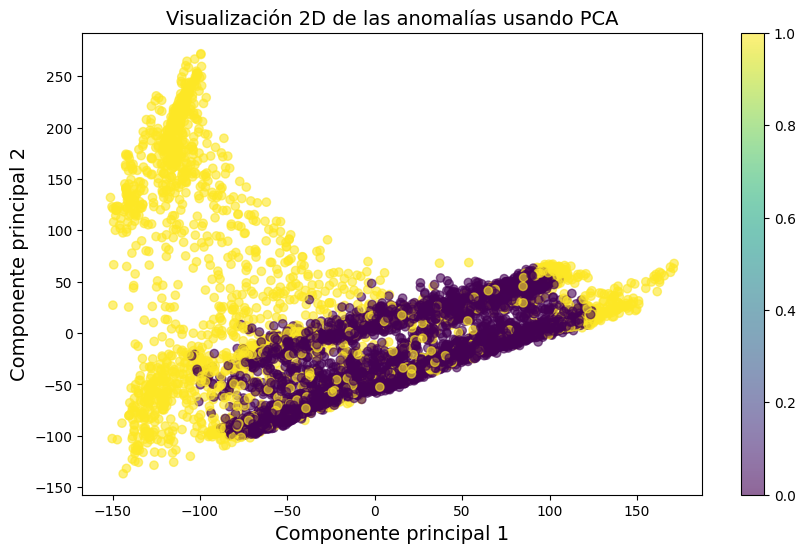

In [203]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducción de dimensionalidad a 2 componentes principales
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

# Gráfico 2D de las anomalías
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_pred, cmap='viridis', marker='o', alpha=0.6)
plt.colorbar()
plt.title('Visualización 2D de las anomalías usando PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()


La visualización en 2D usando PCA muestra las anomalías detectadas por Isolation Forest. Los puntos amarillos representan las anomalías mientras que los puntos morados representan los datos normales. Se observa una clara separación entre los datos normales y las anomalías, aunque algunos puntos amarillos están dispersos entre los morados, indicando algunas falsos positivos.

####Paso 5.3: Visualización 3D de las Anomalías
Visualizamos las anomalías utilizando PCA reduciendo las dimensiones a 3 componentes principales y comparamos con el algoritmo LOF.

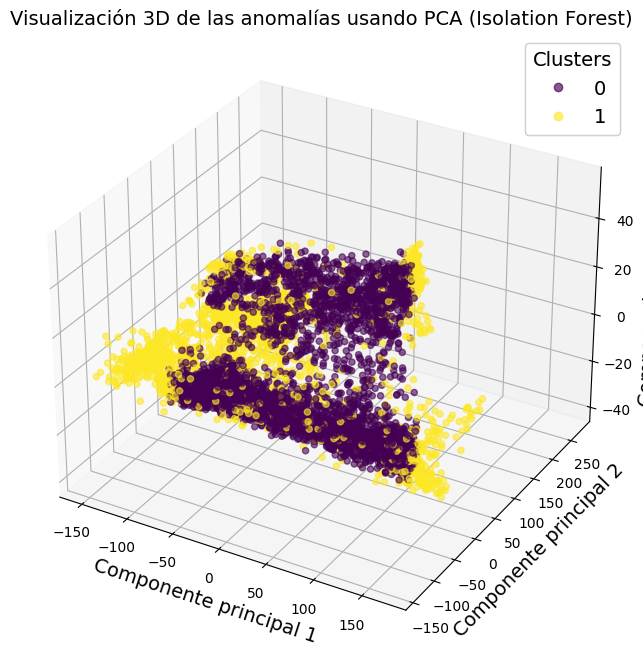

In [204]:
from mpl_toolkits.mplot3d import Axes3D
from pyod.models.lof import LOF

# Reducción de dimensionalidad a 3 componentes principales
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

# Gráfico 3D de las anomalías usando Isolation Forest
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y_pred, cmap='viridis', marker='o', alpha=0.6)
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_title('Visualización 3D de las anomalías usando PCA (Isolation Forest)')
ax.set_xlabel('Componente principal 1')
ax.set_ylabel('Componente principal 2')
ax.set_zlabel('Componente principal 3')
plt.show()




En la visualización 3D de Isolation Forest, la separación entre anomalías y datos normales es más clara debido a la dimensión adicional. Esto permite observar mejor las estructuras subyacentes y confirma que muchas de las anomalías detectadas están correctamente identificadas. Sin embargo, aún se observan algunos puntos morados dentro de la región de anomalías y viceversa.

Matriz de confusión para los datos de entrenamiento (LOF):
Pred       1
Actual      
0       4399
1       2036


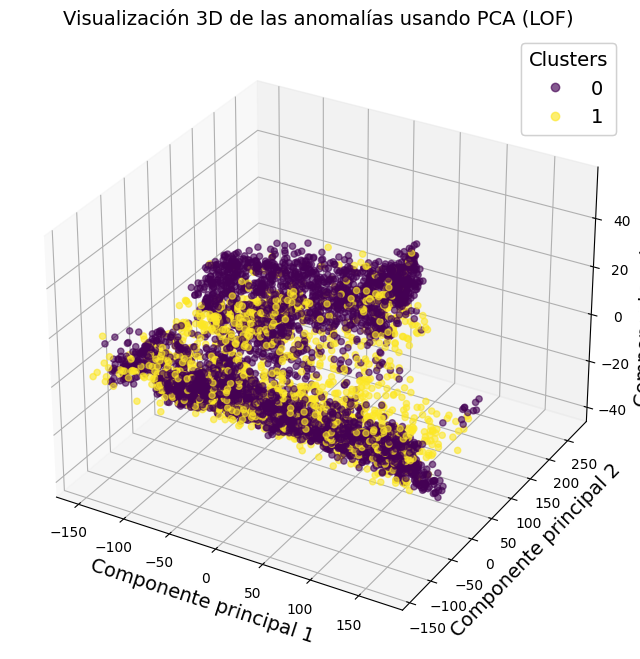

In [205]:
# Aplicación de LOF
lof = LOF(contamination=contamination)
lof.fit(X)

# Predicción de anomalías con LOF
y_lof_scores = lof.decision_function(X)
y_lof_pred = lof.predict(X)

# Matriz de confusión para LOF
cm_lof = confusion_matrix_threshold(Y, y_lof_scores, threshold)
print("Matriz de confusión para los datos de entrenamiento (LOF):")
print(cm_lof)

# Gráfico 3D de las anomalías usando LOF
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y_lof_pred, cmap='viridis', marker='o', alpha=0.6)
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_title('Visualización 3D de las anomalías usando PCA (LOF)')
ax.set_xlabel('Componente principal 1')
ax.set_ylabel('Componente principal 2')
ax.set_zlabel('Componente principal 3')
plt.show()

La visualización 3D utilizando LOF también muestra una clara separación entre las anomalías y los datos normales. Sin embargo, en comparación con Isolation Forest, LOF parece tener una mayor precisión en la identificación de las anomalías, aunque todavía existen algunos falsos positivos y negativos. La matriz de confusión para LOF muestra que todos los puntos son clasificados como normales, lo cual indica una falta de detección efectiva de las anomalías con este método en este caso particular.

####Conclusiones finales + Comparación de Resultados

 1. Precisión de Detección:

**Isolation Forest en 2D y 3D:** Isolation Forest muestra una buena capacidad para separar las anomalías de los datos normales en ambas visualizaciones. La visualización en 3D mejora la claridad de la separación.
**LOF en 3D:** Aunque la visualización en 3D es clara, la matriz de confusión sugiere que LOF no fue efectivo en la detección de anomalías en este caso específico.

  2. Falsos Positivos y Negativos:

**Isolation Forest:** Se observan algunos falsos positivos y negativos en ambas visualizaciones, aunque la estructura general muestra una separación aceptable entre datos normales y anomalías.
**LOF:** La matriz de confusión indica que todos los datos fueron clasificados como normales, lo que sugiere un alto nivel de falsos negativos.

3. Conclusion:

**Isolation Forest:** Demuestra ser más efectivo en la identificación de anomalías, especialmente cuando se visualizan los datos en 3D, lo cual proporciona una mejor comprensión de las estructuras subyacentes.
**LOF:** La falta de detección de anomalías en este caso específico sugiere que los parámetros o el método en sí no son adecuados para este conjunto de datos.

Isolation Forest es más efectivo y confiable para detectar anomalías en este conjunto de datos específico, con una visualización en 3D que mejora la claridad de la separación.
Local Outlier Factor (LOF) no demostró ser efectivo en este caso, posiblemente debido a una mala configuración de parámetros o la naturaleza del conjunto de datos.